###  <span class="emoji"> &#x1F4E6; </span> Loading the necessary Libraries and Modules

In [1]:
# === Built-in ===
import os, re, sys, importlib, subprocess, pkgutil

# === Scientific stack ===
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from pprint import pprint
from typing import Dict, List, Tuple, Optional
from scipy.io import loadmat
from scipy.signal import iirnotch, filtfilt, freqz, welch, hilbert, detrend
from scipy.fft import fft, fftfreq, ifft
from scipy.stats import shapiro, zscore, ttest_rel, pearsonr
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# === Ensure MNE availability ===
try:
    import mne
except ImportError:
    print("Installing MNE...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mne"])
    print("MNE installation completed . . .")
    import mne

# === Ensure ANTIO availability ===
try:
    import antio
except ImportError:
    print("Installing antio...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "antio"])
    print("antio installation completed . . .")
    import antio

import mne.time_frequency as mntf


Installing MNE...
MNE installation completed . . .
Installing antio...
antio installation completed . . .


In [ ]:
!antio sys-info

Platform:                 Linux-6.6.105+-x86_64-with-glibc2.35
Python:                   3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Executable:               /usr/bin/python3
CPU:                      x86_64
Physical cores:           1
Logical cores:            2
RAM:                      12.7 GB
SWAP:                     0.0 GB
antio:                    0.6.1

Core dependencies
✔︎ click:                  8.3.1
✔︎ numpy (<3,>=1.23):      2.0.2
✔︎ packaging:              25.0
✔︎ psutil:                 5.9.5


LIBEEP / __ init __.py

This cell is only representing all the attributes of the InputCNT object that are available.

In [ ]:
InputCNT_Obj = antio.libeep.read_cnt(r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt')
antio.parser.read_triggers(InputCNT_Obj)

([40858,
  1238885,
  1238999,
  1309493,
  1541032,
  1611143,
  1843032,
  1913304,
  2145103,
  2215158,
  2436886,
  3634922,
  3639188,
  3709778,
  3941340,
  4011432,
  4243290,
  4313392,
  4545513,
  4615598,
  4833070,
  6031028,
  6039645,
  6039849,
  0,
  8455573],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ['2',
  '2',
  '16',
  '32',
  '16',
  '32',
  '16',
  '32',
  '16',
  '32',
  '2',
  '2',
  '16',
  '32',
  '16',
  '32',
  '16',
  '32',
  '16',
  '32',
  '2',
  '2',
  '16',
  '32',
  'impedance',
  'impedance'],
 [[9.224,
   5.59,
   5.571,
   10.239,
   6.308,
   11.204,
   6.865,
   5.144,
   5.984,
   2.394,
   8.616,
   0.688,
   5.457,
   9.237,
   9.339,
   6.75,
   4.651,
   4.669,
   12.708,
   10.884,
   13.754,
   7.252,
   4.438,
   11.12,
   14.534,
   13.199,
   8.36,
   2.701,
   13.924,
   24.047001,
   10.384,
   10.171,
   -0.001,
   -0.001,
   -0.001],
  [5.463

In [ ]:
InputCNT_Obj = mne.io.read_raw_ant(r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt', eog = rf"BIP(\d)", preload=False, verbose='ERROR')
print(InputCNT_Obj.info.keys())
print('-'*60)
for key in InputCNT_Obj.info.keys():
  print(f"{key}  :  {InputCNT_Obj.info[key]}")
# for ch in InputCNT_Obj.info['chs']:
#     pprint(ch)
#     print('-'*60)

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_head_t', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'ch_names', 'nchan'])
------------------------------------------------------------
acq_pars  :  None
acq_stim  :  None
ctf_head_t  :  None
description  :  None
dev_head_t  :  None
dev_ctf_t  :  None
dig  :  None
experimenter  :  None
utc_offset  :  None
device_info  :  {'type': 'eego', 'model': 'EE_214', 'serial': '', 'site': ''}
file_id  :  None
highpass  :  0.0
hpi_subsystem  :  None
kit_system_id  :  None
helium_info  :  None
line_freq  :  None
lowpass  :  1000.0
meas_date  :  2019-09-24 15:45:53.769483+00:00
meas_id  :  None
proj_id  :

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


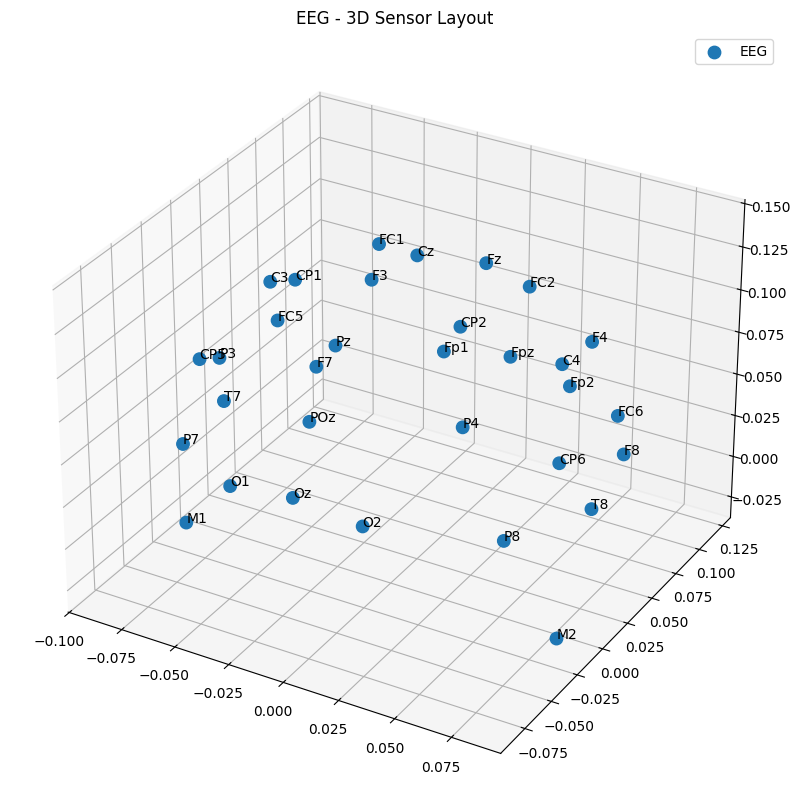

In [ ]:
raw = mne.io.read_raw_ant(r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt', eog = rf"BIP(\d)", preload=False, verbose='ERROR')
montage = mne.channels.make_standard_montage("standard_1005")
raw.set_channel_types({
    'BIP1': 'eog',
    'BIP2': 'eog',
    'RESP1': 'resp'
})
raw.set_montage(
    montage,
    match_case=False,
    on_missing='ignore'
)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# ---- EEG ----
eeg = raw.copy().pick_types(eeg=True)
eeg_pos = np.array([ch['loc'][:3] for ch in eeg.info['chs']])
ax.scatter(eeg_pos[:,0], eeg_pos[:,1], eeg_pos[:,2],
           s=80, label='EEG', alpha=1.0)

# Labels
for ch, pos in zip(eeg.ch_names, eeg_pos):
    ax.text(pos[0], pos[1], pos[2], ch)

ax.set_title("EEG - 3D Sensor Layout")
ax.legend()
plt.show()
fig.savefig("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/eeg_3d_layout.svg", format="svg")


In [ ]:
fs_dir = mne.datasets.fetch_fsaverage(verbose=True)
print(fs_dir)

Using default location ~/mne_data for montage coregistration...
Creating /root/mne_data
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Could not read the /root/.mne/mne-python.json json file during the writing. Assuming it is empty. Got: Expecting value: line 1 column 1 (char 0)
179 files missing from root.txt in /root/mne_data/MNE-fsaverage-data


100%|███████████████████████████████████████| 196M/196M [00:00<00:00, 45.9GB/s]


Extracting missing files
Successfully extracted 179 files
10 files missing from bem.txt in /root/mne_data/MNE-fsaverage-data/fsaverage


100%|███████████████████████████████████████| 239M/239M [00:00<00:00, 39.1GB/s]


Extracting missing files
Successfully extracted 10 files
/root/mne_data/MNE-fsaverage-data/fsaverage


In [ ]:
subjects_dir = os.path.dirname(fs_dir)
subject = "fsaverage"

mne.viz.plot_alignment(
    raw.info,
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces=["head"],          # realistic head
    coord_frame="head",
    meg=False,
    eeg=True,                   # show EEG sensors
    dig=True,                   # show digitized points
)


ValueError: A head<->mri transformation matrix (trans) is required to plot head surfaces in head coordinates, `trans=None` is not allowed

In [ ]:
InputCNT_Obj.annotations

<Annotations | 26 segments: 16 (9), 2 (6), 32 (9), impedance (2)>

In [ ]:
events, event_id = mne.events_from_annotations(InputCNT_Obj)
print(events)
print(event_id)


Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
[[      0       0       4]
 [  40858       0       2]
 [1238885       0       2]
 [1238999       0       1]
 [1309493       0       3]
 [1541032       0       1]
 [1611143       0       3]
 [1843032       0       1]
 [1913304       0       3]
 [2145103       0       1]
 [2215158       0       3]
 [2436886       0       2]
 [3634922       0       2]
 [3639188       0       1]
 [3709778       0       3]
 [3941340       0       1]
 [4011432       0       3]
 [4243290       0       1]
 [4313392       0       3]
 [4545513       0       1]
 [4615598       0       3]
 [4833070       0       2]
 [6031028       0       2]
 [6039645       0       1]
 [6039849       0       3]
 [8455573       0       4]]
{np.str_('16'): 1, np.str_('2'): 2, np.str_('32'): 3, np.str_('impedance'): 4}


In [ ]:
InputCNT_Obj = antio.libeep.read_cnt(r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt')
patient=InputCNT_Obj.get_patient_info(encoding = 'UTF-8')
print("The PATIENT Info: ")
print("Patient Name:",patient[0])
# Info on PATIENT ID and PATIENT SEX is missing.
print("Date of birth of SUB01: ", patient[3])
print("\n")

# --------------------------------------------------
# Channel Related info
# --------------------------------------------------

total_chn = InputCNT_Obj.get_channel_count()
print("The Channel Count for the CNT file of SUB01 is:", total_chn)
print("The Info from the Channel Indices of the CNT file of SUB01 is as follows: ('Channel Label', 'Measure Unit', 'Reference Channel Label', 'Channel Status', 'Channel Type')")
for chn in range(0,35):
  print(f"Channel [{chn}]  : {InputCNT_Obj.get_channel(chn, encoding='utf-8')}") # No information is represent on 'Channel Status' and 'Channel Type'.
print("The Trigger Count for the CNT file of SUB01 is:", InputCNT_Obj.get_trigger_count())

# --------------------------------------------------
#   Sample related functions
# --------------------------------------------------
print(f"Rate of Sampling Frequency is — {InputCNT_Obj.get_sample_frequency()}Hz")
print(f"{InputCNT_Obj.get_sample_count()} data samples were collected at {InputCNT_Obj.get_sample_frequency()}Hz sampling rate frequency over {(InputCNT_Obj.get_sample_count()/(60*InputCNT_Obj.get_sample_frequency())):.2f} minutes time period ")
print(len(InputCNT_Obj.get_samples(2, 3)))
print(InputCNT_Obj.get_samples(2, 3))
print(len(InputCNT_Obj.get_samples(2, 4)))
print(InputCNT_Obj.get_samples(2, 4))
print(InputCNT_Obj.get_samples(1, 3))

# --------------------------------------------------
# Time related functions
# --------------------------------------------------
print(f"The start time for the SUB01 session 01 is {InputCNT_Obj.get_start_time()}")
print(f"The start time with seconds fraction accuracy for the SUB01 session 01 is {InputCNT_Obj.get_start_time_and_fraction()}")

# --------------------------------------------------
# Subject, Hospital and Machine Info
# --------------------------------------------------
print(f"{'-'*60}\n")
print("The Info on Subject 01 is as follows:", InputCNT_Obj.get_patient_info(encoding = 'utf-8'))
print("The DATE of Birth of the Subject 01 is : ", InputCNT_Obj._get_date_of_birth())
print("The Hospital Info:", InputCNT_Obj.get_hospital(encoding = 'utf-8'))
print("The Info on Device used for data collection:", InputCNT_Obj.get_machine_info(encoding='utf-8'))

# --------------------------------------------------
# Trigger Info
# --------------------------------------------------
print(InputCNT_Obj.get_trigger_count())
InputCNT_Obj.get_trigger(3)


The PATIENT Info: 
Patient Name: 01 GX
Date of birth of SUB01:  2019-09-24


The Channel Count for the CNT file of SUB01 is: 35
The Info from the Channel Indices of the CNT file of SUB01 is as follows: ('Channel Label', 'Measure Unit', 'Reference Channel Label', 'Channel Status', 'Channel Type')
Channel [0]  : ('Fp1', 'uV', 'CPz', '', '')
Channel [1]  : ('Fpz', 'uV', 'CPz', '', '')
Channel [2]  : ('Fp2', 'uV', 'CPz', '', '')
Channel [3]  : ('F7', 'uV', 'CPz', '', '')
Channel [4]  : ('F3', 'uV', 'CPz', '', '')
Channel [5]  : ('Fz', 'uV', 'CPz', '', '')
Channel [6]  : ('F4', 'uV', 'CPz', '', '')
Channel [7]  : ('F8', 'uV', 'CPz', '', '')
Channel [8]  : ('FC5', 'uV', 'CPz', '', '')
Channel [9]  : ('FC1', 'uV', 'CPz', '', '')
Channel [10]  : ('FC2', 'uV', 'CPz', '', '')
Channel [11]  : ('FC6', 'uV', 'CPz', '', '')
Channel [12]  : ('M1', 'uV', 'CPz', '', '')
Channel [13]  : ('T7', 'uV', 'CPz', '', '')
Channel [14]  : ('C3', 'uV', 'CPz', '', '')
Channel [15]  : ('Cz', 'uV', 'CPz', '', '')
Ch

('32', 1309493, 0, None, None, None)

In [ ]:
print(antio.parser.read_meas_date(InputCNT_Obj))

2019-09-24 15:45:53.769483+00:00


In [ ]:
print(np.shape(antio.parser.read_data(InputCNT_Obj)))

(35, 8455576)


### Handling Multimodal EEG scandata from ANT Neuro

1. <p align = 'justify'><u><b>Libeep / pyeep.c</b></u><br>
A Python C extension is a module written in the C (or C++) programming language that can be imported and used within a Python program. These extensions allow Python code to call functions and utilize libraries written in C.</p>


2. <p align = 'justify'><u><b>Matlab handling of EVT files</b></u><br>
A .mexw64 file in MATLAB is a compiled binary MEX function for 64-bit Windows.</p>


In [ ]:
import pkgutil

package_path = antio.__path__

print("stored path of ANTIO package: ", package_path)
for module in pkgutil.walk_packages(package_path):
    print(module.name)


stored path of ANTIO package:  ['/usr/local/lib/python3.12/dist-packages/antio']
_commands
_version
io
libeep
parser
utils


In [ ]:
package_path

['/usr/local/lib/python3.12/dist-packages/antio']

In [8]:
dataset_root = r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET'
subject_id=['001', '002', '003', '004', '005', '006']

dataset_root = Path(dataset_root)
if not dataset_root.exists():
    raise FileNotFoundError(f"Sourcedata directory not found: {dataset_root}")

# Initialize output dictionary
data = {}

RawANT_Sub01 = mne.io.read_raw_ant(r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt')

print(RawANT_Sub01.annotations)
# Get all subject directories
if subject_id:
    subject_dirs = [dataset_root / f"SUB{id}" for id in subject_id]
else:
    subject_dirs = sorted([d for d in dataset_root.iterdir()
                          if d.is_dir() and d.name.startswith('SUB')])

print(subject_dirs)

Reading ANT file /content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt
<Annotations | 26 segments: 16 (9), 2 (6), 32 (9), impedance (2)>
[PosixPath('/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB001'), PosixPath('/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB002'), PosixPath('/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB003'), PosixPath('/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB004'), PosixPath('/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB005'), PosixPath('/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB006')]


In [ ]:
cnt_path = r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt'
cnt_obj = antio.libeep.read_cnt(cnt_path)
print(cnt_obj.get_trigger_count())
print(cnt_obj.get_trigger(0))

print(antio.io.read_raw_ant(cnt_path))

26
('2', 40858, 0, None, None, None)
Reading ANT file /content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt
<RawANT | GX_0101.cnt, 35 x 8455576 (4227.8 s), ~32 KiB, data not loaded>


In [ ]:
libeep_module=antio.libeep.InputCNT
print(libeep_module)

Exception ignored in: <function BaseCNT.__del__ at 0x7fdff5fb20c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/antio/libeep/__init__.py", line 29, in __del__
    if self._handle != -1:
       ^^^^^^^^^^^^
AttributeError: 'InputCNT' object has no attribute '_handle'


TypeError: InputCNT.__init__() missing 1 required positional argument: 'handle'

### <span style="emoji">&#9881;&#xFE0F;</span> Custom Method Designing

#### Definig an EEG Data loader for ANT Neuro format.

<blockquote> <p align = 'justify'> Data collected through <i>ANT Neuro eego sports amplifier</i> is stored into — <i>'.cnt'</i> (continuous eeg data) and <i>'.evt'</i> (event file) formats. </p> <p>The features of <u>eego sports amplifier</u> are listed below:
<ul>
  <li><b>Input Impedance:</b> 1GOhm</li>
  <li><b>Max Sampling Rate:</b> 2kHz across all referential channels</li>
  <li><b>Resolution:</b> 24 bit</li>
  <li><b>Trigger Input:</b> 8-bit TTL</li>
</ul></p></blockquote>



In [ ]:
# ------------------------------------------------------------
# Defining EEG data loader function for ANT Neuro format
# ------------------------------------------------------------

def load_ant_neuro_cnt_evt(dataset_root: str,
                           subject_id: list[str] = None,
                           session_id: list[str] = None,
                           verbose: bool = True) -> Dict:

    """
    Load ANT Neuro .cnt and .evt files from BIDS-like sourcedata structure.

    Parameters
    ----------
    dataset_root : str
        Path to dataset root directory
    subject_id : str, optional
        Specific subject to load (e.g., '001'). If None, loads all subjects.
    session_id : str, optional
        Specific session to load (e.g., '01'). If None, loads all sessions.
    verbose : bool
        Print loading progress

    Returns
    -------
    data : dict
        Dictionary with structure:
        {
            'SUB01': {
                'Sess01': {
                    'raw': mne.io.Raw object,
                    'events': numpy array (shape: n_events x 3),
                    'event_id': dict,
                    'metadata': dict
                },
                'ses-02': {...}
            },
            'sub-002': {...}
        }
    """

    dataset_root = Path(dataset_root)
    if not dataset_root.exists():
        raise FileNotFoundError(f"Sourcedata directory not found: {dataset_root}")

    # Initialize output dictionary
    data = {}

# -------------------------------------------  Locating SUbject Directory  -------------------------------------------

    # Get all subject directories
    if subject_id:
        subject_dirs = [dataset_root / f"SUB{id}" for id in subject_id]
    else:
        subject_dirs = sorted([d for d in dataset_root.iterdir()
                              if d.is_dir() and d.name.startswith('SUB')])
    # Iterate over subjects
    for sub_dir in subject_dirs:
        subject = sub_dir.name
        sub_id = re.search(r'\d+$', sub_dir.name).group()

        if verbose:
            print(f"\n{'='*71}")
            print(f"Loading {subject}")
            print(f"{'='*71}")

        data[subject] = {}

In [ ]:
# ------------------------------------------------------------
# Defining EEG data loader function for ANT Neuro format
# ------------------------------------------------------------

def load_ant_neuro_cnt_evt(dataset_root: str,
                           subject_id: list[str] = None,
                           session_id: list[str] = None,
                           verbose: bool = True) -> Dict:
    """
    Load ANT Neuro .cnt and .evt files from BIDS-like sourcedata structure.

    Parameters
    ----------
    dataset_root : str
        Path to dataset root directory
    subject_id : str, optional
        Specific subject to load (e.g., '001'). If None, loads all subjects.
    session_id : str, optional
        Specific session to load (e.g., '01'). If None, loads all sessions.
    verbose : bool
        Print loading progress

    Returns
    -------
    data : dict
        Dictionary with structure:
        {
            'SUB01': {
                'Sess01': {
                    'raw': mne.io.Raw object,
                    'events': numpy array (shape: n_events x 3),
                    'event_id': dict,
                    'metadata': dict
                },
                'ses-02': {...}
            },
            'sub-002': {...}
        }
    """

    dataset_root = Path(dataset_root)
    if not dataset_root.exists():
        raise FileNotFoundError(f"Sourcedata directory not found: {dataset_root}")

    # Initialize output dictionary
    data = {}

# -------------------------------------------  Locating SUbject Directory  -------------------------------------------

    # Get all subject directories
    if subject_id:
        subject_dirs = [dataset_root / f"SUB{id}" for id in subject_id]
    else:
        subject_dirs = sorted([d for d in dataset_root.iterdir()
                              if d.is_dir() and d.name.startswith('SUB')])
    # Iterate over subjects
    for sub_dir in subject_dirs:
        subject = sub_dir.name
        sub_id = re.search(r'\d+$', sub_dir.name).group()

        if verbose:
            print(f"\n{'='*71}")
            print(f"Loading {subject}")
            print(f"{'='*71}")

        data[subject] = {}


# ---------------  Loading 'CNT' and the corresponding 'EVT' files for the corresponding Sessions  ---------------

        # Search for all .cnt files with specific session ids
        if session_id:
            cnt_files = cnt_files = [f for ses in session_id for f in sub_dir.glob(f"GX_{sub_id}{ses}.cnt")]

        else:
            cnt_files = list(sub_dir.glob(f'GX_{sub_id}*.cnt'))


        for cnt_file in sorted(cnt_files):
            ses_id = f"Sess{re.search(rf'GX_{sub_id}(\d+)\.cnt', cnt_file.name).group(1)}"
            data[subject][ses_id] = {}
            evt_file_id = cnt_file.with_suffix('.evt')  # same base name, .evt extension
            evt_file = evt_file_id if evt_file_id.exists() else None


# -----------------------  Loading .cnt file using MNE  ------------------------

            if verbose:
              print(f"{'='*25} Loading {cnt_file.name} {'='*25}")

            try:
                raw = mne.io.read_raw_ant(
                    str(cnt_file),
                    eog = rf"BIP(\d)",
                    preload=False,
                    verbose='ERROR')


                if verbose:
                    print(f" \u2714 EEG loaded: {len(raw.ch_names)} channels, "
                          f"{raw.n_times} samples, {raw.info['sfreq']} Hz\n")

            except Exception as e:
                if verbose:
                    print(f" \u2718 Error loading {cnt_file.name}: {e}\n")
                continue


# ----------------  Loading corresponding .evt file using MNE  -----------------

            if verbose:
              print(f"{'='*25} Loading {evt_file.name} {'='*25}")

            try:
              # Read .evt file (ANT Neuro binary event format)
              events, event_id = mne.events_from_annotations(raw)

              if verbose:
                  print(f" \u2714 Events extracted: {len(events)} events, {len(event_id)} unique codes \n")

            except Exception as e:
                if verbose:
                    print(f" \u2718 Error extracting events from {evt_file.name}: {e}\n")
                continue


            # Store metadata
            metadata = {
                'filename': cnt_file.name,
                'evt_filename': evt_file.name if evt_file.exists() else None,
                'n_channels': len(raw.ch_names),
                'n_samples': raw.n_times,
                'info': raw.info,
                'sfreq': raw.info['sfreq'],
                'duration': raw.times[-1],
                'ch_names': raw.ch_names
            }

            # Append to session data
            data[subject][ses_id] = {
                'raw': raw,
                'events': events,
                'event_id': event_id,
                'metadata': metadata,
                'annotations': raw.annotations,
            }

    if verbose:
        print(f"{'='*71}")
        print(f"Loading complete!")
        print(f"{'='*71}\n")

    return data


#### Defining Event File ( '.evt' ) loader
<blockquote> The event information is captured as '.evt' file formats of the dataset.</blockquote>


In [ ]:
# -----------------------
# Helper: read pyeep trigger list (embedded)
# -----------------------
def _read_embedded_triggers_from_handle(handle):
    """
    Use pyeep.get_trigger_count and pyeep.get_trigger to get triggers embedded in file.
    Returns a list of dicts with keys similar to read_trg output.
    """
    if pyeep is None:
        raise RuntimeError("pyeep is not available; cannot read embedded triggers")
    out = []
    ntrig = pyeep.get_trigger_count(handle)
    for i in range(ntrig):
        # pyeep.get_trigger(handle, index) -> (trigger_string, sample, duration, condition, description, impedances)
        try:
            trig = pyeep.get_trigger(handle, i)
        except Exception:
            continue
        # normalize returned tuple
        # safe indexing if pyeep returns bytes or str
        # depending on pyeep build the types can vary; coerce carefully
        try:
            trigger_label = _maybe_decode(trig[0])
            sample_offset = int(trig[1])
            duration = int(trig[2]) if len(trig) > 2 else 0
            condition = _maybe_decode(trig[3]) if len(trig) > 3 else None
            description = _maybe_decode(trig[4]) if len(trig) > 4 else None
            impedances = _maybe_decode(trig[5]) if len(trig) > 5 else None
        except Exception:
            trigger_label = _maybe_decode(trig[0]) if len(trig) > 0 else None
            sample_offset = int(trig[1]) if len(trig) > 1 else None
            duration = None
            condition = None
            description = None
            impedances = None
        out.append({
            "time_s": None,   # we can compute if start_date is known; leave None here
            "time_ms": None,
            "offset": sample_offset,
            "label": trigger_label,
            "duration": duration,
            "condition": condition,
            "description": description,
            "impedances": impedances
        })
    return out


In [ ]:
# -----------------------
# eepv4_read_info equivalent
# -----------------------
def read_cnt_info(fn):
    """
    Read CNT header info using pyeep/libeep.

    Returns dict:
      {
        'version': str,
        'channel_count': int,
        'channels': [str,...],
        'sample_count': int,
        'sample_rate': float,
        'trigger_count': int,
        'triggers': [ {offset,label,duration,...}, ... ]
      }
    """
    fn = Path(fn)
    if not fn.exists():
        raise FileNotFoundError(f"{fn} not found")
    if pyeep is None:
        raise RuntimeError("pyeep/libeep is required for read_cnt_info; please install it")

    handle = pyeep.read(str(fn))
    if handle is None or handle < 0:
        raise IOError(f"libeep/pyeep could not open {fn}")

    info = {}
    info["version"] = _maybe_decode(pyeep.get_version()) if hasattr(pyeep, "get_version") else None
    info["channel_count"] = int(pyeep.get_channel_count(handle))
    # channel labels
    channels = []
    for ch_i in range(info["channel_count"]):
        raw_label = pyeep.get_channel_label(handle, ch_i)
        channels.append(_maybe_decode(raw_label))
    info["channels"] = channels
    info["sample_rate"] = float(pyeep.get_sample_frequency(handle))
    info["sample_count"] = int(pyeep.get_sample_count(handle))

    # triggers: priority for external files handled in read_cnt (caller). Here we read embedded triggers
    embedded = _read_embedded_triggers_from_handle(handle)
    info["trigger_count"] = len(embedded)
    info["triggers_embedded"] = embedded

    # close handle
    pyeep.close(handle)
    return info

In [ ]:
# -----------------------
# read_cnt (eepv4_read equivalent)
# - sample1/sample2 are **0-based** sample indices (Python style); if user passes 1-based (matlab) be careful.
# - returns dict with 'samples' shaped (nchan, nsamples)
# - also loads triggers following precedence: .evt -> .trg -> embedded
# -----------------------
def read_cnt(fn, sample1=None, sample2=None):
    """
    Read data segment from .cnt (or .avg) file.

    Parameters
    ----------
    fn : path to .cnt file
    sample1, sample2 : integer sample indices (0-based). If None -> full file.

    Returns
    -------
    data : dict with keys:
      - version
      - samples : numpy array shape (nchan, nsamples) (units: uV if libeep provides it)
      - triggers : list of trigger dicts (from .evt/.trg/embedded)
      - start_in_seconds : sample1 / sfreq
      - sfreq, channels, sample_count
    """
    fn = Path(fn)
    if not fn.exists():
        raise FileNotFoundError(fn)
    if pyeep is None:
        raise RuntimeError("pyeep/libeep is required for read_cnt; please install it")

    # open handle
    handle = pyeep.read(str(fn))
    if handle is None or handle < 0:
        raise IOError(f"libeep/pyeep could not open {fn}")

    nchan = int(pyeep.get_channel_count(handle))
    nsamp_total = int(pyeep.get_sample_count(handle))
    sfreq = float(pyeep.get_sample_frequency(handle))

    # default sample range: full file
    if sample1 is None:
        sample1 = 0
    if sample2 is None:
        sample2 = nsamp_total

    # Sanity clamp
    sample1 = max(0, int(sample1))
    sample2 = min(nsamp_total, int(sample2))
    npoints = sample2 - sample1
    if npoints <= 0:
        raise ValueError("sample2 must be > sample1 after clipping")

    # retrieve samples from pyeep
    # pyeep.get_samples(handle, fro, to) is expected to return a flat Python sequence of floats
    raw_list = pyeep.get_samples(handle, sample1, sample2)
    # raw_list length should be npoints * nchan
    arr = np.asarray(raw_list, dtype=np.float32)
    # reshape to (npoints, nchan) then transpose
    try:
        arr = arr.reshape((npoints, nchan)).T  # (nchan, npoints)
    except Exception as e:
        # if reshape fails, try alternative ordering (some wrappers return channel-major)
        if arr.size == npoints * nchan:
            arr = arr.reshape((nchan, npoints))
        else:
            pyeep.close(handle)
            raise RuntimeError(f"Unexpected sample buffer length: {arr.size}, expected {npoints*nchan}") from e

    # prepare triggers: read .evt first, then .trg, else embedded via pyeep
    base = fn.with_suffix('')
    evt_file = fn.with_suffix('.evt')
    trg_file = fn.with_suffix('.trg')

    triggers = None
    if evt_file.exists():
        # .evt format: we expect binary ANTevt structure or plain text? In README .evt is supported by libeep.
        # Many times .evt is vendor binary format; prefer libeep's annotation extraction through events_from_annotations
        # But we cannot parse vendor .evt by hand reliably here; attempt pyeep/embedded triggers if available
        # try: read with pyeep annotations if library provides
        try:
            # Some systems: pyeep may not read external .evt automatically; we attempt to call events_from_annotations via mne later
            triggers = []
            # If .evt is text-like, fallback to read_trg
            try:
                trg_txt = read_trg(evt_file)
                triggers = trg_txt
            except Exception:
                triggers = None
        except Exception:
            triggers = None

    if triggers is None and trg_file.exists():
        triggers = read_trg(trg_file)

    if triggers is None:
        # try embedded via pyeep
        triggers = _read_embedded_triggers_from_handle(handle)

    # collect channel labels
    channels = []
    for ch_i in range(nchan):
        channels.append(_maybe_decode(pyeep.get_channel_label(handle, ch_i)))

    version = _maybe_decode(pyeep.get_version()) if hasattr(pyeep, "get_version") else None

    pyeep.close(handle)

    data = {
        "version": version,
        "samples": arr,                 # numpy (nchan, npoints)
        "triggers": triggers,
        "start_in_seconds": sample1 / sfreq,
        "sfreq": sfreq,
        "channels": channels,
        "sample_count": nsamp_total
    }
    return data

#### Defining a Channel mapping function
<blockquote> <p><b><u>Mapping Dictionary format:</u></b></p>
{ <br>' Channel Types ' : [ ( ' Channel index ' : ' Channel Name ' ) , () , . . . ] ,<br> . . . } </blockquote>

In [ ]:
# ------------------------------------------------------------
# Custom Channel Identifier method
# ------------------------------------------------------------

def channel_names_by_type(raw: mne.io.Raw, verbose: bool = True):
    """
    Returns a dict: { 'eeg': [(idx, name), ...], 'eog': [...], ... }
    """
    info = raw.info
    indices = mne.channel_indices_by_type(info)

    out = {}

    print(f"Identifying the channel types and mapping the channel indices to the corresponding channel names {'.'*10}")
    for ch_type, idx_list in indices.items():
        out[ch_type] = [(idx, raw.ch_names[idx]) for idx in idx_list]

    if verbose:
      pprint.pprint(out)

    return out

In [ ]:
# ------------------------------------------------------------
# Custom Avent Annotator checker
# ------------------------------------------------------------


def check_session_annotaion(data: Dict[Any, Any], subject_id: list[str] = None, session_id: list[str] = None, verbose: bool=True) -> mne.annotations.Annotations:

  t_data = data_dir
  if subject_id:

  return anotate

### Performing Operations

In [ ]:
# ------------------------------------------------------------
# DATA Loading
# ------------------------------------------------------------

# Assigning directory path to variables and defining other necessary Global variables

data_dir = r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET'

all_sub_data = load_ant_neuro_cnt_evt(dataset_root = data_dir, verbose = True)

# Looking into the Metadata of the loaded .CNT file format
#print(sub01_data['SUB01']['Sess01']['raw'].info)
#print("\n")

#print(mne.channel_indices_by_type(sub01_data['SUB01']['Sess01']['raw'].info, ['misc']))


Loading SUB01
========================= Loading GX_0101.cnt =========================
 ✔ EEG loaded: 35 channels, 8455576 samples, 2000.0 Hz

========================= Loading GX_0101.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
 ✔ Events extracted: 26 events, 4 unique codes 

========================= Loading GX_0102.cnt =========================
 ✔ EEG loaded: 35 channels, 6366506 samples, 2000.0 Hz

========================= Loading GX_0102.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
 ✔ Events extracted: 27 events, 4 unique codes 

========================= Loading GX_0103.cnt =========================
 ✔ EEG loaded: 35 channels, 8529990 samples, 2000.0 Hz

========================= Loading GX_0103.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impeda

In [ ]:
type(all_sub_data['SUB06']['Sess01']['raw'].annotations)

mne.annotations.Annotations

Among the 35 channels —  

*   32 are EEG chanels
*   2 are bipolar snap electrodes categorised under the *'misc'* channel type
*   1 channel is allocated to respiratory sensor.

The bipolar snap channels are named: "BIP1" (index- 32) and "BIP2" (index- 33)






In [ ]:
raw = sub01_data['SUB01']['Sess01']['raw']  # Raw object
mapping = channel_names_by_type(raw)
pprint.pprint(mapping)


{'bio': [],
 'chpi': [],
 'csd': [],
 'dbs': [],
 'dipole': [],
 'ecg': [],
 'ecog': [],
 'eeg': [(np.int64(0), 'Fp1'),
         (np.int64(1), 'Fpz'),
         (np.int64(2), 'Fp2'),
         (np.int64(3), 'F7'),
         (np.int64(4), 'F3'),
         (np.int64(5), 'Fz'),
         (np.int64(6), 'F4'),
         (np.int64(7), 'F8'),
         (np.int64(8), 'FC5'),
         (np.int64(9), 'FC1'),
         (np.int64(10), 'FC2'),
         (np.int64(11), 'FC6'),
         (np.int64(12), 'M1'),
         (np.int64(13), 'T7'),
         (np.int64(14), 'C3'),
         (np.int64(15), 'Cz'),
         (np.int64(16), 'C4'),
         (np.int64(17), 'T8'),
         (np.int64(18), 'M2'),
         (np.int64(19), 'CP5'),
         (np.int64(20), 'CP1'),
         (np.int64(21), 'CP2'),
         (np.int64(22), 'CP6'),
         (np.int64(23), 'P7'),
         (np.int64(24), 'P3'),
         (np.int64(25), 'Pz'),
         (np.int64(26), 'P4'),
         (np.int64(27), 'P8'),
         (np.int64(28), 'POz'),
         (

In [ ]:
# ------------------------------------------------------------
# DATA Loading
# ------------------------------------------------------------

data_dir = r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET'
all_sub_data = load_ant_neuro_cnt_evt(dataset_root= data_dir, subject_id = None, session_id = None, verbose = True)


Loading SUB01
========================= Loading GX_0101.cnt =========================
 ✔ EEG loaded: 35 channels, 8455576 samples, 2000.0 Hz

========================= Loading GX_0101.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
 ✔ Events extracted: 26 events, 4 unique codes 

========================= Loading GX_0102.cnt =========================
 ✔ EEG loaded: 35 channels, 6366506 samples, 2000.0 Hz

========================= Loading GX_0102.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
 ✔ Events extracted: 27 events, 4 unique codes 

========================= Loading GX_0103.cnt =========================
 ✔ EEG loaded: 35 channels, 8529990 samples, 2000.0 Hz

========================= Loading GX_0103.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impeda

In [ ]:
with open("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.evt", "rb") as f:
    head = f.read()

print(head)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00h\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x17class dcEventsLibrary_c\x00\x1a\x00\x00\x00\xff\xff\xff\xff\x14class dcEpochEvent_c\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0bEpoch Event\x00\x04\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xfe+\x04\x07\x95Z\xe5@=\x18g\xc2\xe5g\xc9?\x01\x00\x00\x00\tEventCode\x03\x00\x02\x00\x00\x00\x00\xff\xff\xff\xff\x14class dcEpochEvent_c\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0bEpoch Event\x00\x04\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00ot\xcf?\x95Z\xe5@+\x95\xa6\xf7C"\xcb?\x01\x00\x00\x00\tEventCode\x03\x00\x02\x00\x00\x00\x00\xff\xff\xff\xff\x14class dcEpochEvent_c\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0bEp

In [ ]:
print(loadmat("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/MATLABfilestream_0101.mat").keys())

dict_keys(['__header__', '__version__', '__globals__', 'ClockSStart', 'Clocklim', 'Montages', 'StimCountA', 'StimCountB', 'answer', 'par', 'stim', 'timerec', 'txt', 'txthold'])


In [ ]:
class MultimodalSignalAnalyzer:
    """Comprehensive analysis of EEG, ECG, EOG, tES signals"""

    def __init__(self, raw: mne.io.Raw, events: np.ndarray = None,
                 event_id: dict = None, sfreq: float = 500):
        self.raw = raw
        self.events = events
        self.event_id = event_id
        self.sfreq = sfreq
        self.results = {}

    # ========== EEG ANALYSIS ==========

    def analyze_eeg_spectral(self, picks: list = None, fmin: float = 0.5,
                            fmax: float = 50, n_fft: int = 2048) -> dict:
        """
        Compute power spectral density and frequency band power

        Mathematical basis:
        PSD via Welch method: S(f) = (1/K) * Σ |FFT(windowed_segment)|²
        """

        if picks is None:
            picks = mne.pick_types(self.raw.info, eeg=True, exclude='bads')

        print(" EEG Spectral Analysis...")

        # get data for selected channels: shape (n_channels, n_times)
        data = self.raw.get_data(picks=picks, start=0, stop =int(60*self.sfreq))
        sfreq = self.raw.info['sfreq']
        # psd_array_welch accepts arrays and returns (n_channels, n_freqs), freqs
        psd, freqs = mntf.psd_array_welch(data, sfreq=sfreq, fmin=fmin, fmax=fmax,
                                     n_fft=n_fft, average="mean")

        # Frequency bands
        bands = {
            'Delta': (0.5, 4),
            'Theta': (4, 8),
            'Alpha': (8, 13),
            'Beta': (13, 30),
            'Gamma': (30, 50)
        }

        band_power = {}
        for band_name, (f_low, f_high) in bands.items():
            band_mask = (freqs >= f_low) & (freqs <= f_high)
            band_power[band_name] = psd[:, band_mask].mean(axis=1)  # Per channel

        # Spectral features
        results = {
            'psd': psd,
            'freqs': freqs,
            'band_power': band_power,
            'dominant_freq': freqs[np.argmax(psd, axis=1)],  # Per channel
            'spectral_centroid': self._compute_spectral_centroid(psd, freqs),
            'spectral_edge_freq': self._compute_spectral_edge_freq(psd, freqs),
        }

        self.results['eeg_spectral'] = results
        return results

    def _compute_spectral_centroid(self, psd: np.ndarray, freqs: np.ndarray) -> np.ndarray:
        """
        Spectral centroid: weighted average frequency
        Centroid = Σ(f * S(f)) / Σ(S(f))
        """
        centroid = np.sum(freqs[np.newaxis, :] * psd, axis=1) / np.sum(psd, axis=1)
        return centroid

    def _compute_spectral_edge_freq(self, psd: np.ndarray, freqs: np.ndarray,
                                   percentile: float = 95) -> np.ndarray:
        """
        Spectral edge frequency: frequency below which N% of power lies
        """
        cumsum_psd = np.cumsum(psd, axis=1)
        total_power = cumsum_psd[:, -1, np.newaxis]

        edge_freq = np.zeros(psd.shape[0])
        for ch in range(psd.shape[0]):
            idx = np.argmax(cumsum_psd[ch] >= (percentile / 100) * total_power[ch, 0])
            edge_freq[ch] = freqs[idx]

        return edge_freq

    def analyze_eeg_entropy(self, picks: list = None) -> dict:
        """
        Compute entropy measures: Shannon, Sample, Permutation

        Mathematical basis:
        Shannon: H = -Σ p(x) * log₂(p(x))
        Sample: SampEn(m,r) = -log(B^(m+1) / B^m)
        Permutation: Based on ordinal patterns
        """

        from scipy.stats import entropy as scipy_entropy

        if picks is None:
            picks = mne.pick_types(self.raw.info, eeg=True, exclude='bads')

        print("🔍 EEG Entropy Analysis...")

        data = self.raw.get_data(picks=picks)
        entropy_results = {}

        # Shannon entropy (amplitude-based)
        bins = 20
        shannon_ent = np.zeros(len(picks))
        for ch_idx, ch in enumerate(picks):
            hist, _ = np.histogram(data[ch_idx], bins=bins)
            p = hist / np.sum(hist)
            shannon_ent[ch_idx] = scipy_entropy(p, base=2)

        entropy_results['shannon'] = shannon_ent

        # Sample entropy (temporal regularity)
        sampent = self._compute_sample_entropy(data, m=2, r=0.2)
        entropy_results['sample_entropy'] = sampent

        # Approximate entropy
        approx_ent = self._compute_approximate_entropy(data, m=2, r=0.2)
        entropy_results['approximate_entropy'] = approx_ent

        # Permutation entropy
        perm_ent = self._compute_permutation_entropy(data, m=3)
        entropy_results['permutation_entropy'] = perm_ent

        self.results['eeg_entropy'] = entropy_results
        return entropy_results

    def _compute_sample_entropy(self, data: np.ndarray, m: int = 2,
                               r: float = 0.2) -> np.ndarray:
        """
        Sample Entropy: SampEn(m, r) = -log(B^(m+1) / B^m)
        Measures self-similarity; lower = more regular
        """

        def _count_template_matches(data_1d, m, r):
            N = len(data_1d)
            templates = np.lib.stride_tricks.as_strided(
                data_1d, shape=(N-m+1, m), strides=(data_1d.strides[0], data_1d.strides[0])
            )

            # Compute pairwise distances
            dists = np.abs(templates[:, np.newaxis, :] - templates[np.newaxis, :, :]).max(axis=2)

            # Count matches (excluding self-match)
            matches = np.sum(dists <= r, axis=1) - 1

            return np.sum(matches) / (N - m + 1)

        sampent = np.zeros(data.shape[0])
        for ch in range(data.shape[0]):
            # Normalize
            x = (data[ch] - np.mean(data[ch])) / (np.std(data[ch]) + 1e-10)

            B_m = _count_template_matches(x, m, r)
            B_m1 = _count_template_matches(x, m+1, r)

            if B_m1 > 0:
                sampent[ch] = -np.log(B_m1 / (B_m + 1e-10))
            else:
                sampent[ch] = 0

        return sampent

    def _compute_approximate_entropy(self, data: np.ndarray, m: int = 2,
                                    r: float = 0.2) -> np.ndarray:
        """
        Approximate Entropy: ApEn(m, r) = φ(m, r) - φ(m+1, r)
        Estimates complexity and regularity
        """

        def _phi(data_1d, m, r):
            N = len(data_1d)
            templates = np.lib.stride_tricks.as_strided(
                data_1d, shape=(N-m+1, m), strides=(data_1d.strides[0], data_1d.strides[0])
            )

            dists = np.abs(templates[:, np.newaxis, :] - templates[np.newaxis, :, :]).max(axis=2)
            counts = np.sum(dists <= r, axis=1)

            return np.sum(np.log(counts / (N - m + 1))) / (N - m + 1)

        apen = np.zeros(data.shape[0])
        for ch in range(data.shape[0]):
            x = (data[ch] - np.mean(data[ch])) / (np.std(data[ch]) + 1e-10)

            apen[ch] = _phi(x, m, r) - _phi(x, m+1, r)

        return apen

    def _compute_permutation_entropy(self, data: np.ndarray, m: int = 3,
                                    tau: int = 1) -> np.ndarray:
        """
        Permutation Entropy: Based on ordinal patterns
        Robust to noise, sensitive to nonlinear dynamics
        """

        def _ordinal_pattern(x, m, tau):
            """Get ordinal patterns for embedding"""
            N = len(x)
            permutations = []

            for i in range(N - (m-1)*tau):
                embedding = [x[i + j*tau] for j in range(m)]
                perm = np.argsort(embedding)
                permutations.append(tuple(perm))

            return permutations

        perm_ent = np.zeros(data.shape[0])
        for ch in range(data.shape[0]):
            x = (data[ch] - np.mean(data[ch])) / (np.std(data[ch]) + 1e-10)

            perms = _ordinal_pattern(x, m, tau)
            unique, counts = np.unique(perms, axis=0, return_counts=True)

            # Shannon entropy of permutation distribution
            p = counts / len(perms)
            perm_ent[ch] = -np.sum(p * np.log2(p + 1e-10))

        return perm_ent

    # ========== ECG ANALYSIS ==========

    def analyze_ecg_heart_rate(self, picks: list = None) -> dict:
        """
        Extract R-peaks and compute heart rate variability

        Mathematical basis:
        HR = 60 / RR_interval (beats/min)
        HRV features: SDNN, RMSSD, pNN50
        """

        if picks is None:
            picks = mne.pick_types(self.raw.info, ecg=True)

        if len(picks) == 0:
            print("⚠ No ECG channels found")
            return {}

        print("🔍 ECG Analysis...")

        # Load first 60 seconds for peak detection
        ecg_data = self.raw.get_data(picks=picks[0], start=0,
                                     stop=int(60 * self.sfreq))[0]

        # Detect R-peaks (QRS complex)
        r_peaks, _ = signal.find_peaks(ecg_data, height=np.max(ecg_data) * 0.5,
                                       distance=int(0.4 * self.sfreq))

        # RR intervals (milliseconds)
        rr_intervals = np.diff(r_peaks) / self.sfreq * 1000

        # Heart rate
        hr = 60000 / rr_intervals  # beats per minute

        # HRV features
        hrv_features = {
            'mean_hr': np.mean(hr),
            'std_hr': np.std(hr),
            'sdnn': np.std(rr_intervals),  # Standard deviation of NN intervals
            'rmssd': np.sqrt(np.mean(np.diff(rr_intervals)**2)),  # Root mean square of successive differences
            'pnn50': np.sum(np.abs(np.diff(rr_intervals)) > 50) / len(np.diff(rr_intervals)) * 100,  # % > 50ms
        }

        results = {
            'r_peaks': r_peaks,
            'rr_intervals': rr_intervals,
            'heart_rate': hr,
            'hrv_features': hrv_features
        }

        self.results['ecg'] = results
        return results

    # ========== EOG ANALYSIS ==========

    def analyze_eog_eye_movements(self, picks: list = None) -> dict:
        """
        Detect blinks and eye movements from EOG

        Blink detection: Amplitude > threshold + characteristic shape
        """

        if picks is None:
            picks = mne.pick_types(self.raw.info, eog=True)

        if len(picks) == 0:
            print("⚠ No EOG channels found")
            return {}

        print("🔍 EOG Analysis...")

        # Load data
        eog_data = self.raw.get_data(picks=picks, start=0,
                                    stop=int(60 * self.sfreq))

        blink_stats = {}

        for eog_idx, eog_ch in enumerate(picks):
            data = eog_data[eog_idx]

            # Detect blinks (high amplitude, short duration)
            threshold = np.std(data) * 3
            blink_candidates, _ = signal.find_peaks(np.abs(data), height=threshold,
                                                   distance=int(0.2 * self.sfreq))

            # Filter by duration (blinks ~100-200ms)
            blink_peaks = []
            for peak in blink_candidates:
                left = max(0, peak - int(0.1 * self.sfreq))
                right = min(len(data), peak + int(0.1 * self.sfreq))

                duration = (right - left) / self.sfreq * 1000
                if 50 < duration < 300:
                    blink_peaks.append(peak)

            blink_stats[self.raw.ch_names[eog_ch]] = {
                'n_blinks': len(blink_peaks),
                'blink_rate': len(blink_peaks) / (len(data) / self.sfreq) * 60,  # blinks/min
                'blink_peaks': blink_peaks
            }

        self.results['eog'] = blink_stats
        return blink_stats

    # ========== tES ANALYSIS ==========

    def analyze_tes_response(self, baseline_dur: float = 2, stim_dur: float = 30,
                            tes_trigger_code: int = 16) -> dict:
        """
        Analyze EEG response to transcranial electrical stimulation

        Compare: pre-stim baseline vs. during-stim vs. post-stim periods
        """

        if self.events is None:
            print("⚠ No events found for tES analysis")
            return {}

        print("🔍 tES Response Analysis...")

        # Filter events for stimulation onsets
        stim_events = self.events[self.events[:, 2] == tes_trigger_code]

        if len(stim_events) == 0:
            print("⚠ No stimulation events found")
            return {}

        eeg_picks = mne.pick_types(self.raw.info, eeg=True, exclude='bads')

        # Epoch around each stimulation
        tmin_pre = -baseline_dur
        tmax_post = stim_dur + baseline_dur

        epochs = mne.Epochs(self.raw, stim_events, event_id=tes_trigger_code,
                           tmin=tmin_pre, tmax=tmax_post, baseline=None,
                           picks=eeg_picks, preload=False, verbose=False)

        # Extract periods
        n_samples_pre = int(baseline_dur * self.sfreq)
        n_samples_stim = int(stim_dur * self.sfreq)

        # Power analysis
        bands = {'Alpha': (8, 13), 'Beta': (13, 30)}
        tes_response = {}

        for band_name, (f_low, f_high) in bands.items():
            epochs_band = epochs.copy().filter(f_low, f_high)
            data = epochs_band.get_data()

            # Pre-stim baseline
            power_pre = np.mean(data[:, :, :n_samples_pre]**2, axis=(1, 2))

            # During stim
            power_stim = np.mean(data[:, :, n_samples_pre:n_samples_pre+n_samples_stim]**2, axis=(1, 2))

            # Post-stim
            power_post = np.mean(data[:, :, n_samples_pre+n_samples_stim:]**2, axis=(1, 2))

            # Percent change from baseline
            pct_change_stim = 100 * (power_stim - power_pre) / (power_pre + 1e-10)
            pct_change_post = 100 * (power_post - power_pre) / (power_pre + 1e-10)

            # Paired t-test
            t_stat, p_val = ttest_rel(power_stim, power_pre)

            tes_response[band_name] = {
                'power_pre': power_pre,
                'power_stim': power_stim,
                'power_post': power_post,
                'pct_change_stim': pct_change_stim,
                'pct_change_post': pct_change_post,
                't_stat': t_stat,
                'p_value': p_val,
                'mean_pct_change': np.mean(pct_change_stim)
            }

        self.results['tes_response'] = tes_response
        return tes_response

    # ========== MULTIMODAL CORRELATION ==========

    def analyze_eeg_ecg_correlation(self) -> dict:
        """
        Correlation between EEG oscillations and heart rate variability

        Tests: Does cardiac rhythm modulate brain oscillations?
        """

        eeg_picks = mne.pick_types(self.raw.info, eeg=True, exclude='bads')
        ecg_picks = mne.pick_types(self.raw.info, ecg=True)

        if len(eeg_picks) == 0 or len(ecg_picks) == 0:
            print("⚠ Need both EEG and ECG data")
            return {}

        print("🔍 EEG-ECG Correlation Analysis...")

        # Get data (first 5 minutes)
        duration = min(300 * self.sfreq, self.raw.n_times)

        eeg_data = self.raw.get_data(picks=eeg_picks, start=0, stop=int(duration))
        ecg_data = self.raw.get_data(picks=ecg_picks[0], start=0, stop=int(duration))[0]

        # Filter EEG alpha band
        eeg_alpha = signal.butter(4, [8, 13], btype='band',
                                 fs=self.sfreq, output='sos')
        eeg_alpha_filtered = signal.sosfilt(eeg_alpha, eeg_data, axis=1)

        # Compute alpha envelope (Hilbert transform)
        analytic_signal = signal.hilbert(eeg_alpha_filtered, axis=1)
        alpha_envelope = np.abs(analytic_signal)

        # Compute heart rate from ECG
        r_peaks, _ = signal.find_peaks(ecg_data, height=np.max(ecg_data) * 0.5,
                                       distance=int(0.4 * self.sfreq))

        # Interpolate RR intervals to EEG sampling rate
        rr_intervals = np.diff(r_peaks) / self.sfreq
        rr_interp = np.interp(np.arange(len(ecg_data)), r_peaks[:-1], rr_intervals)

        # Correlation: alpha envelope vs. heart rate
        correlations = np.zeros(len(eeg_picks))
        p_values = np.zeros(len(eeg_picks))

        for ch_idx in range(len(eeg_picks)):
            r, p = pearsonr(alpha_envelope[ch_idx], rr_interp)
            correlations[ch_idx] = r
            p_values[ch_idx] = p

        return {
            'correlations': correlations,
            'p_values': p_values,
            'significant_channels': np.where(p_values < 0.05)[0]
        }


# ===== USAGE =====
subject_ids = [f'SUB0{i}' for i in range(1, 7)]  # sub-001 to sub-006
Raw_data = []
Events_data = []
for sub_id in subject_ids:
    analyzer = MultimodalSignalAnalyzer(all_sub_data[sub_id]['Sess01']['raw'],
                                      all_sub_data[sub_id]['Sess01']['events'],
                                      all_sub_data[sub_id]['Sess01']['event_id'],
                                      sfreq=500)

    # Run all analyses
    eeg_spectral = analyzer.analyze_eeg_spectral()
    eeg_entropy = analyzer.analyze_eeg_entropy()
    ecg_results = analyzer.analyze_ecg_heart_rate()
    eog_results = analyzer.analyze_eog_eye_movements()
    tes_response = analyzer.analyze_tes_response()
    eeg_ecg_corr = analyzer.analyze_eeg_ecg_correlation()


In [ ]:
"""
Optimized analyzer for GX Dataset: Concurrent EEG, ECG, EOG under tES
Fixes memory issues and implements dataset-specific analyses

Dataset Info:
- 9 HD-tES types: 3 locations (Frontal, Motor, Parietal) × 3 waveforms (DC, 5Hz, 30Hz)
- EEG: 2 kHz sampling, high-density
- ECG: Lead I configuration
- EOG: Horizontal configuration
- Behavioral: Continuous vigilance task (CTT)
- Sessions: ~70 minutes each
"""

class OptimizedMultimodalAnalyzer:
    """
    Memory-efficient analyzer for GX Dataset
    Processes data in chunks to avoid memory errors
    """

    def __init__(self, raw: mne.io.Raw, events: np.ndarray = None,
                 event_id: dict = None, sfreq: float = 2000):
        """
        Initialize analyzer

        Parameters:
        -----------
        raw : mne.io.Raw
            Raw EEG data
        events : np.ndarray
            Events array (n_events, 3)
        event_id : dict
            Event code mapping
        sfreq : float
            Sampling frequency (default: 2000 Hz for GX dataset)
        """
        self.raw = raw
        self.events = events
        self.event_id = event_id
        self.sfreq = sfreq
        self.results = {}

        # Identify channel types
        self._identify_channels()

    def _identify_channels(self):
        """Identify EEG, ECG, EOG channels"""
        self.eeg_picks = mne.pick_types(self.raw.info, eeg=True, exclude='bads')
        self.ecg_picks = mne.pick_types(self.raw.info, ecg=True)
        self.eog_picks = mne.pick_types(self.raw.info, eog=True)

        print(f"Channel Summary:")
        print(f"  EEG channels: {len(self.eeg_picks)}")
        print(f"  ECG channels: {len(self.ecg_picks)}")
        print(f"  EOG channels: {len(self.eog_picks)}")

# ========== MEMORY-EFFICIENT EEG SPECTRAL ANALYSIS ==========

    def analyze_eeg_spectral(self, duration_sec: float = 60,
                            fmin: float = 0.5, fmax: float = 50,
                            n_fft: int = 2048) -> dict:
        """
        Memory-efficient spectral analysis
        Only loads specified duration
        """
        print("\n EEG Spectral Analysis...")

        if len(self.eeg_picks) == 0:
            print(" No EEG channels found")
            return {}

        # Load only specified duration
        n_samples = int(duration_sec * self.sfreq)
        data = self.raw.get_data(picks=self.eeg_picks, start=0, stop=n_samples)

        # Compute PSD
        psd, freqs = mntf.psd_array_welch(
            data, sfreq=self.sfreq, fmin=fmin, fmax=fmax,
            n_fft=n_fft, average="mean"
        )

        # Frequency bands (relevant for tES effects)
        bands = {
            'Delta': (0.5, 4),
            'Theta': (4, 8),
            'Alpha': (8, 13),
            'Beta': (13, 30),
            'Gamma': (30, 50)
        }

        band_power = {}
        for band_name, (f_low, f_high) in bands.items():
            band_mask = (freqs >= f_low) & (freqs <= f_high)
            band_power[band_name] = psd[:, band_mask].mean(axis=1)

        results = {
            'psd': psd,
            'freqs': freqs,
            'band_power': band_power,
            'dominant_freq': freqs[np.argmax(psd, axis=1)],
            'mean_alpha_power': np.mean(band_power['Alpha']),
            'mean_beta_power': np.mean(band_power['Beta'])
        }

        self.results['eeg_spectral'] = results
        print(f"  ✓ Computed spectral features for {len(self.eeg_picks)} channels")
        print(f"  ✓ Mean Alpha power: {results['mean_alpha_power']:.2e}")

        return results

# ========== MEMORY-EFFICIENT ENTROPY (CHUNKED) ==========

    def analyze_eeg_entropy_chunked(self, duration_sec: float = 60,
                                   chunk_duration: float = 10) -> dict:
        """
        Compute entropy in chunks to avoid memory issues

        Key fix: Process data in small chunks instead of all at once
        """
        print("\n🔍 EEG Entropy Analysis (Chunked)...")

        if len(self.eeg_picks) == 0:
            print("No EEG channels found")
            return {}

        n_samples = int(duration_sec * self.sfreq)
        chunk_samples = int(chunk_duration * self.sfreq)
        n_chunks = n_samples // chunk_samples

        # Initialize results
        shannon_ent_all = []
        sampent_all = []

        # Process each chunk
        for chunk_idx in range(n_chunks):
            start = chunk_idx * chunk_samples
            stop = start + chunk_samples

            data_chunk = self.raw.get_data(picks=self.eeg_picks, start=start, stop=stop)

            # Shannon entropy
            bins = 20
            shannon_chunk = []
            for ch_idx in range(data_chunk.shape[0]):
                hist, _ = np.histogram(data_chunk[ch_idx], bins=bins, density=True)
                hist = hist + 1e-10  # Avoid log(0)
                shannon_chunk.append(scipy_entropy(hist, base=2))

            shannon_ent_all.append(shannon_chunk)

            # Sample entropy (simplified, memory-efficient version)
            sampent_chunk = self._compute_sample_entropy_efficient(data_chunk, m=2, r=0.2)
            sampent_all.append(sampent_chunk)

        # Average across chunks
        results = {
            'shannon_entropy': np.mean(shannon_ent_all, axis=0),
            'sample_entropy': np.mean(sampent_all, axis=0),
            'mean_shannon': np.mean(shannon_ent_all),
            'mean_sample': np.mean(sampent_all)
        }

        self.results['eeg_entropy'] = results
        print(f"  ✓ Computed entropy for {len(self.eeg_picks)} channels")
        print(f"  ✓ Mean Shannon entropy: {results['mean_shannon']:.3f}")

        return results

    def _compute_sample_entropy_efficient(self, data: np.ndarray,
                                         m: int = 2, r: float = 0.2,
                                         max_samples: int = 5000) -> np.ndarray:
        """
        Memory-efficient Sample Entropy
        Uses downsampling if data is too large
        """
        sampent = np.zeros(data.shape[0])

        for ch in range(data.shape[0]):
            # Downsample if necessary
            if data.shape[1] > max_samples:
                step = data.shape[1] // max_samples
                x = data[ch, ::step]
            else:
                x = data[ch]

            # Normalize
            x = (x - np.mean(x)) / (np.std(x) + 1e-10)

            try:
                # Simplified sample entropy calculation
                N = len(x)
                B = np.zeros(N - m)
                A = np.zeros(N - m - 1)

                for i in range(N - m):
                    template = x[i:i+m]
                    B[i] = np.sum(np.max(np.abs(x[i+1:N-m+1].reshape(-1, 1) -
                                                template.reshape(1, -1)), axis=1) <= r)

                for i in range(N - m - 1):
                    template = x[i:i+m+1]
                    A[i] = np.sum(np.max(np.abs(x[i+1:N-m].reshape(-1, 1) -
                                                template.reshape(1, -1)), axis=1) <= r)

                B_sum = np.sum(B)
                A_sum = np.sum(A)

                if B_sum > 0 and A_sum > 0:
                    sampent[ch] = -np.log(A_sum / B_sum)
                else:
                    sampent[ch] = 0

            except:
                sampent[ch] = 0

        return sampent

# ========== ECG ANALYSIS ==========

    def analyze_ecg_hrv(self, duration_sec: float = 60) -> dict:
        """
        ECG and Heart Rate Variability analysis
        """
        print("\n ECG & HRV Analysis...")

        if len(self.ecg_picks) == 0:
            print("  ⚠ No ECG channels found")
            return {}

        # Load ECG data
        n_samples = int(duration_sec * self.sfreq)
        ecg_data = self.raw.get_data(picks=self.ecg_picks[0], start=0, stop=n_samples)[0]

        # Detect R-peaks
        # Bandpass filter first (5-15 Hz for QRS)
        sos = signal.butter(4, [5, 15], btype='band', fs=self.sfreq, output='sos')
        ecg_filtered = signal.sosfilt(sos, ecg_data)

        # Find peaks
        peak_height = np.percentile(np.abs(ecg_filtered), 90)
        r_peaks, properties = signal.find_peaks(
            ecg_filtered,
            height=peak_height,
            distance=int(0.4 * self.sfreq)  # Min 0.4s between beats
        )

        if len(r_peaks) < 2:
            print("  Insufficient R-peaks detected")
            return {}

        # RR intervals (milliseconds)
        rr_intervals = np.diff(r_peaks) / self.sfreq * 1000

        # Heart rate (bpm)
        hr = 60000 / rr_intervals

        # HRV time-domain features
        sdnn = np.std(rr_intervals)
        rmssd = np.sqrt(np.mean(np.diff(rr_intervals)**2))
        pnn50 = np.sum(np.abs(np.diff(rr_intervals)) > 50) / len(np.diff(rr_intervals)) * 100

        results = {
            'n_beats': len(r_peaks),
            'mean_hr': np.mean(hr),
            'std_hr': np.std(hr),
            'sdnn': sdnn,
            'rmssd': rmssd,
            'pnn50': pnn50,
            'r_peaks': r_peaks,
            'rr_intervals': rr_intervals
        }

        self.results['ecg_hrv'] = results
        print(f"  ✓ Detected {len(r_peaks)} R-peaks")
        print(f"  ✓ Mean HR: {results['mean_hr']:.1f} bpm")
        print(f"  ✓ SDNN: {sdnn:.1f} ms, RMSSD: {rmssd:.1f} ms")

        return results

# ========== EOG ANALYSIS ==========

    def analyze_eog_blinks(self, duration_sec: float = 60) -> dict:
        """
        EOG blink detection
        """
        print("\n  EOG Blink Analysis...")

        if len(self.eog_picks) == 0:
            print("  ⚠ No EOG channels found")
            return {}

        n_samples = int(duration_sec * self.sfreq)

        results = {}
        for eog_idx in range(len(self.eog_picks)):
            eog_data = self.raw.get_data(picks=self.eog_picks[eog_idx],
                                        start=0, stop=n_samples)[0]

            # Detect blinks (large amplitude events)
            threshold = np.std(eog_data) * 3
            blink_peaks, _ = signal.find_peaks(
                np.abs(eog_data),
                height=threshold,
                distance=int(0.2 * self.sfreq)  # Min 200ms between blinks
            )

            blink_rate = len(blink_peaks) / duration_sec * 60  # blinks/min

            ch_name = self.raw.ch_names[self.eog_picks[eog_idx]]
            results[ch_name] = {
                'n_blinks': len(blink_peaks),
                'blink_rate_per_min': blink_rate,
                'blink_peaks': blink_peaks
            }

            print(f"  ✓ {ch_name}: {len(blink_peaks)} blinks ({blink_rate:.1f}/min)")

        self.results['eog_blinks'] = results
        return results

# ========== tES-SPECIFIC ANALYSIS ==========

    def analyze_tes_effects(self, baseline_sec: float = 30,
                           stim_sec: float = 30,
                           post_sec: float = 30) -> dict:
        """
        Analyze tES effects on EEG

        GX Dataset specifics:
        - Event codes correspond to different tES conditions
        - Stimulation types: DC, 5Hz, 30Hz
        - Locations: Frontal, Motor, Parietal
        """
        print("\n tES Effects Analysis...")

        if self.events is None or len(self.events) == 0:
            print(" No events found")
            return {}

        # Get unique event codes (tES conditions)
        unique_events = np.unique(self.events[:, 2])
        print(f"  Found {len(unique_events)} unique event types: {unique_events}")

        results = {}

        for event_code in unique_events:
            event_mask = self.events[:, 2] == event_code
            event_times = self.events[event_mask, 0]

            if len(event_times) == 0:
                continue

            print(f"\n Analyzing event code {event_code} ({len(event_times)} trials)...")

            # Extract epochs around each event
            condition_results = self._analyze_single_tes_condition(
                event_times, baseline_sec, stim_sec, post_sec
            )

            results[f'event_{event_code}'] = condition_results

        self.results['tes_effects'] = results
        return results

    def _analyze_single_tes_condition(self, event_times: np.ndarray,
                                     baseline_sec: float,
                                     stim_sec: float,
                                     post_sec: float) -> dict:
        """
        Analyze single tES condition
        """
        baseline_samples = int(baseline_sec * self.sfreq)
        stim_samples = int(stim_sec * self.sfreq)
        post_samples = int(post_sec * self.sfreq)

        # Bands of interest
        bands = {
            'Alpha': (8, 13),
            'Beta': (13, 30)
        }

        results = {}

        for band_name, (f_low, f_high) in bands.items():
            power_baseline = []
            power_stim = []
            power_post = []

            # Process each trial
            for event_sample in event_times:
                try:
                    # Extract data around event
                    start_baseline = int(event_sample - baseline_samples)
                    end_post = int(event_sample + stim_samples + post_samples)

                    if start_baseline < 0 or end_post > self.raw.n_times:
                        continue

                    data = self.raw.get_data(
                        picks=self.eeg_picks,
                        start=start_baseline,
                        stop=end_post
                    )

                    # Filter to band
                    sos = signal.butter(4, [f_low, f_high], btype='band',
                                      fs=self.sfreq, output='sos')
                    data_filt = signal.sosfilt(sos, data, axis=1)

                    # Compute power (average across channels)
                    baseline_data = data_filt[:, :baseline_samples]
                    stim_data = data_filt[:, baseline_samples:baseline_samples+stim_samples]
                    post_data = data_filt[:, baseline_samples+stim_samples:]

                    power_baseline.append(np.mean(baseline_data**2))
                    power_stim.append(np.mean(stim_data**2))
                    power_post.append(np.mean(post_data**2))

                except:
                    continue

            if len(power_baseline) > 0:
                power_baseline = np.array(power_baseline)
                power_stim = np.array(power_stim)
                power_post = np.array(power_post)

                # Percent change
                pct_change_stim = 100 * (power_stim - power_baseline) / (power_baseline + 1e-10)
                pct_change_post = 100 * (power_post - power_baseline) / (power_baseline + 1e-10)

                # Statistics
                if len(power_baseline) > 1:
                    t_stat, p_val = ttest_rel(power_stim, power_baseline)
                else:
                    t_stat, p_val = 0, 1

                results[band_name] = {
                    'n_trials': len(power_baseline),
                    'mean_pct_change_stim': np.mean(pct_change_stim),
                    'mean_pct_change_post': np.mean(pct_change_post),
                    'std_pct_change_stim': np.std(pct_change_stim),
                    't_statistic': t_stat,
                    'p_value': p_val,
                    'significant': p_val < 0.05
                }

                print(f" {band_name}: {np.mean(pct_change_stim):+.1f}% " +
                      f"(p={p_val:.3f}{'*' if p_val < 0.05 else ''})")

        return results

# ========== BRAIN-HEART COUPLING ==========

    def analyze_brain_heart_coupling(self, duration_sec: float = 300) -> dict:
        """
        Analyze coupling between EEG oscillations and heart rate
        """
        print("\n Brain-Heart Coupling Analysis...")

        if len(self.eeg_picks) == 0 or len(self.ecg_picks) == 0:
            print("  ⚠ Need both EEG and ECG channels")
            return {}

        # Limit duration to avoid memory issues
        n_samples = min(int(duration_sec * self.sfreq), self.raw.n_times)

        # Get EEG data (sample of channels)
        sample_channels = self.eeg_picks[::2]  # Every 2nd channel
        eeg_data = self.raw.get_data(picks=sample_channels, start=0, stop=n_samples)

        # Get ECG data
        ecg_data = self.raw.get_data(picks=self.ecg_picks[0], start=0, stop=n_samples)[0]

        # Filter EEG to alpha band
        sos_alpha = signal.butter(4, [8, 13], btype='band', fs=self.sfreq, output='sos')
        eeg_alpha = signal.sosfilt(sos_alpha, eeg_data, axis=1)

        # Get alpha envelope
        alpha_envelope = np.abs(signal.hilbert(eeg_alpha, axis=1))

        # Get heart rate
        sos_ecg = signal.butter(4, [5, 15], btype='band', fs=self.sfreq, output='sos')
        ecg_filt = signal.sosfilt(sos_ecg, ecg_data)
        r_peaks, _ = signal.find_peaks(ecg_filt, distance=int(0.4*self.sfreq))

        if len(r_peaks) < 10:
            print("  ⚠ Insufficient R-peaks for coupling analysis")
            return {}

        # Interpolate RR intervals
        rr = np.diff(r_peaks) / self.sfreq
        rr_interp = np.interp(np.arange(n_samples), r_peaks[:-1], rr)

        # Correlations
        correlations = []
        p_values = []

        for ch_idx in range(len(sample_channels)):
            # Downsample for correlation (every 100 samples)
            envelope_ds = alpha_envelope[ch_idx, ::100]
            rr_ds = rr_interp[::100]

            min_len = min(len(envelope_ds), len(rr_ds))
            r, p = pearsonr(envelope_ds[:min_len], rr_ds[:min_len])
            correlations.append(r)
            p_values.append(p)

        results = {
            'correlations': np.array(correlations),
            'p_values': np.array(p_values),
            'mean_correlation': np.mean(correlations),
            'n_significant': np.sum(np.array(p_values) < 0.05)
        }

        self.results['brain_heart_coupling'] = results
        print(f"  ✓ Mean correlation: {results['mean_correlation']:.3f}")
        print(f"  ✓ Significant channels: {results['n_significant']}/{len(sample_channels)}")

        return results

# ========== SUMMARY REPORT ==========

    def generate_summary_report(self) -> pd.DataFrame:
        """
        Generate summary report of all analyses
        """
        summary_data = []

        # EEG Spectral
        if 'eeg_spectral' in self.results:
            res = self.results['eeg_spectral']
            summary_data.append({
                'Analysis': 'EEG Spectral',
                'Metric': 'Mean Alpha Power',
                'Value': f"{res['mean_alpha_power']:.2e}"
            })
            summary_data.append({
                'Analysis': 'EEG Spectral',
                'Metric': 'Mean Beta Power',
                'Value': f"{res['mean_beta_power']:.2e}"
            })

        # EEG Entropy
        if 'eeg_entropy' in self.results:
            res = self.results['eeg_entropy']
            summary_data.append({
                'Analysis': 'EEG Entropy',
                'Metric': 'Mean Shannon Entropy',
                'Value': f"{res['mean_shannon']:.3f}"
            })

        # ECG HRV
        if 'ecg_hrv' in self.results:
            res = self.results['ecg_hrv']
            summary_data.append({
                'Analysis': 'ECG HRV',
                'Metric': 'Mean Heart Rate (bpm)',
                'Value': f"{res['mean_hr']:.1f}"
            })
            summary_data.append({
                'Analysis': 'ECG HRV',
                'Metric': 'SDNN (ms)',
                'Value': f"{res['sdnn']:.1f}"
            })

        # Brain-Heart Coupling
        if 'brain_heart_coupling' in self.results:
            res = self.results['brain_heart_coupling']
            summary_data.append({
                'Analysis': 'Brain-Heart Coupling',
                'Metric': 'Mean Correlation',
                'Value': f"{res['mean_correlation']:.3f}"
            })

        df = pd.DataFrame(summary_data)
        return df


# ========== USAGE EXAMPLE ==========

def run_complete_analysis(all_sub_data: dict,
                         subject_ids: list = None,
                         session: str = 'Sess01') -> dict:
    """
    Run complete analysis pipeline for GX dataset
    """
    if subject_ids is None:
        subject_ids = list(all_sub_data.keys())

    all_results = {}

    for sub_id in subject_ids:
        print(f"\n{'='*70}")
        print(f"ANALYZING {sub_id} - {session}")
        print(f"{'='*70}")

        try:
            # Get data
            raw = all_sub_data[sub_id][session]['raw']
            events = all_sub_data[sub_id][session]['events']
            event_id = all_sub_data[sub_id][session]['event_id']

            # Initialize analyzer
            analyzer = OptimizedMultimodalAnalyzer(
                raw=raw,
                events=events,
                event_id=event_id,
                sfreq=raw.info['sfreq']
            )

            # Run analyses (with shorter durations to save memory)
            results = {}
            results['spectral'] = analyzer.analyze_eeg_spectral(duration_sec=30)
            results['entropy'] = analyzer.analyze_eeg_entropy_chunked(duration_sec=30)
            results['ecg'] = analyzer.analyze_ecg_hrv(duration_sec=60)
            results['eog'] = analyzer.analyze_eog_blinks(duration_sec=60)
            results['tes'] = analyzer.analyze_tes_effects(baseline_sec=10,
                                                         stim_sec=20,
                                                         post_sec=10)
            results['coupling'] = analyzer.analyze_brain_heart_coupling(duration_sec=60)

            # Generate summary
            summary = analyzer.generate_summary_report()
            print(f"\n{'='*70}")
            print("SUMMARY REPORT")
            print(f"{'='*70}")
            print(summary.to_string(index=False))

            all_results[sub_id] = {
                'analyzer': analyzer,
                'results': results,
                'summary': summary
            }

        except Exception as e:
            print(f"  ✗ Error analyzing {sub_id}: {e}")
            continue

    return all_results


# ========== MAIN EXECUTION ==========
if __name__ == "__main__":

    print("="*70)
    print("GX DATASET ANALYZER - MEMORY OPTIMIZED")
    print("="*70)
    print("\nUsage:")
    print("  all_results = run_complete_analysis(all_sub_data)")
    print("\nOr for single subject:")
    print("  analyzer = OptimizedMultimodalAnalyzer(")
    print("      raw=all_sub_data['SUB01']['Sess01']['raw'],")
    print("      events=all_sub_data['SUB01']['Sess01']['events'],")
    print("      event_id=all_sub_data['SUB01']['Sess01']['event_id'],")
    print("      sfreq=2000")
    print("  )")
    print("  results = analyzer.analyze_eeg_spectral()")

    results = analyzer.analyze_eeg_spectral()

GX DATASET ANALYZER - MEMORY OPTIMIZED

Usage:
  all_results = run_complete_analysis(all_sub_data)

Or for single subject:
  analyzer = OptimizedMultimodalAnalyzer(
      raw=all_sub_data['SUB01']['Sess01']['raw'],
      events=all_sub_data['SUB01']['Sess01']['events'],
      event_id=all_sub_data['SUB01']['Sess01']['event_id'],
      sfreq=2000
  )
  results = analyzer.analyze_eeg_spectral()
 EEG Spectral Analysis...
Effective window size : 1.024 (s)


/tmp/ipython-input-2810201520.py:29: RuntimeWarning: Unit % not recognized, not scaling. Please report the unit on a github issue on https://github.com/mne-tools/mne-python.
  data = self.raw.get_data(picks=picks, start=0, stop =int(60*self.sfreq))


In [ ]:
# ============================================================================
# COMPLETE GOOGLE COLAB SETUP - GX DATASET ANALYSIS
# ============================================================================
# This notebook cell contains everything you need to run on Colab
# Copy and run this entire cell first, then use the analyzer

# === 1. IMPORTS ===
import numpy as np
import mne
import mne.time_frequency as mntf
from scipy import signal
from scipy.stats import entropy as scipy_entropy, ttest_rel, pearsonr
import pandas as pd
import warnings

# Suppress all warnings (including the "Unit % not recognized" warning)
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")

# === 2. LOAD YOUR DATA (using your existing loader) ===
# Your load_ant_neuro_cnt_evt function should already be defined
# If not, make sure to run that cell first

# data_dir = r'/content/drive/MyDrive/.../Concur_EegEcgEog_under_tES_DATASET'
# all_sub_data = load_ant_neuro_cnt_evt(dataset_root=data_dir,
#                                        subject_id=None,
#                                        session_id=None,
#                                        verbose=True)

# === 3. QUICK TEST - SINGLE SUBJECT ANALYSIS ===

def quick_analysis_single_subject(all_sub_data, subject='SUB01', session='Sess01'):
    """
    Quick analysis for a single subject - good for testing
    """
    print(f"\n{'='*70}")
    print(f"QUICK ANALYSIS: {subject} - {session}")
    print(f"{'='*70}")

    # Import the optimized analyzer (make sure you've run the artifact code)
    from __main__ import OptimizedMultimodalAnalyzer

    # Get data
    raw = all_sub_data[subject][session]['raw']
    events = all_sub_data[subject][session]['events']
    event_id = all_sub_data[subject][session]['event_id']

    # Initialize analyzer
    analyzer = OptimizedMultimodalAnalyzer(
        raw=raw,
        events=events,
        event_id=event_id,
        sfreq=raw.info['sfreq']
    )

    # Run analyses (SHORT durations to save memory and time)
    print("\n🚀 Running analyses...")
    results = {}

    try:
        print("\n1/6 Running spectral analysis...")
        results['spectral'] = analyzer.analyze_eeg_spectral(duration_sec=30)
    except Exception as e:
        print(f"   ✗ Error: {e}")

    try:
        print("\n2/6 Running entropy analysis...")
        results['entropy'] = analyzer.analyze_eeg_entropy_chunked(duration_sec=20)
    except Exception as e:
        print(f"   ✗ Error: {e}")

    try:
        print("\n3/6 Running ECG analysis...")
        results['ecg'] = analyzer.analyze_ecg_hrv(duration_sec=60)
    except Exception as e:
        print(f"   ✗ Error: {e}")

    try:
        print("\n4/6 Running EOG analysis...")
        results['eog'] = analyzer.analyze_eog_blinks(duration_sec=60)
    except Exception as e:
        print(f"   ✗ Error: {e}")

    try:
        print("\n5/6 Running tES effects analysis...")
        results['tes'] = analyzer.analyze_tes_effects(
            baseline_sec=10,
            stim_sec=20,
            post_sec=10
        )
    except Exception as e:
        print(f"   ✗ Error: {e}")

    try:
        print("\n6/6 Running brain-heart coupling analysis...")
        results['coupling'] = analyzer.analyze_brain_heart_coupling(duration_sec=60)
    except Exception as e:
        print(f"   ✗ Error: {e}")

    # Generate summary
    try:
        summary = analyzer.generate_summary_report()
        print(f"\n{'='*70}")
        print("📊 SUMMARY REPORT")
        print(f"{'='*70}")
        print(summary.to_string(index=False))
    except Exception as e:
        print(f"Error generating summary: {e}")

    return analyzer, results


# === 4. BATCH ANALYSIS FOR ALL SUBJECTS ===

def batch_analysis_all_subjects(all_sub_data, max_subjects=None):
    """
    Run analysis on multiple subjects

    Parameters:
    -----------
    all_sub_data : dict
        Dictionary with all subject data
    max_subjects : int, optional
        Limit number of subjects (for testing)
    """
    subject_ids = list(all_sub_data.keys())

    if max_subjects:
        subject_ids = subject_ids[:max_subjects]
        print(f"⚠ Limiting to first {max_subjects} subjects for memory")

    all_results = {}

    for sub_id in subject_ids:
        try:
            # Get first session for each subject
            sessions = list(all_sub_data[sub_id].keys())
            if len(sessions) == 0:
                print(f"⚠ No sessions found for {sub_id}")
                continue

            session = sessions[0]  # Use first session

            print(f"\n{'='*70}")
            print(f"ANALYZING: {sub_id} - {session}")
            print(f"{'='*70}")

            analyzer, results = quick_analysis_single_subject(
                all_sub_data, subject=sub_id, session=session
            )

            all_results[sub_id] = {
                'analyzer': analyzer,
                'results': results
            }

            # Force garbage collection to free memory
            import gc
            gc.collect()

        except Exception as e:
            print(f"\n✗ Error analyzing {sub_id}: {e}")
            continue

    print(f"\n{'='*70}")
    print(f"✓ COMPLETED ANALYSIS FOR {len(all_results)} SUBJECTS")
    print(f"{'='*70}")

    return all_results


# === 5. VISUALIZATION HELPER ===

def plot_spectral_results(analyzer):
    """
    Quick visualization of spectral results
    """
    import matplotlib.pyplot as plt

    if 'eeg_spectral' not in analyzer.results:
        print("⚠ No spectral results to plot")
        return

    results = analyzer.results['eeg_spectral']

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Mean PSD
    ax1 = axes[0]
    mean_psd = results['psd'].mean(axis=0)
    ax1.semilogy(results['freqs'], mean_psd, linewidth=2)
    ax1.set_xlabel('Frequency (Hz)', fontsize=12)
    ax1.set_ylabel('Power Spectral Density', fontsize=12)
    ax1.set_title('Mean Power Spectrum', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Plot 2: Band Powers
    ax2 = axes[1]
    band_power = results['band_power']
    bands = list(band_power.keys())
    means = [np.mean(band_power[b]) for b in bands]
    stds = [np.std(band_power[b]) for b in bands]

    x_pos = np.arange(len(bands))
    ax2.bar(x_pos, means, yerr=stds, capsize=5, alpha=0.7)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(bands, fontsize=11)
    ax2.set_ylabel('Mean Power', fontsize=12)
    ax2.set_title('Power by Frequency Band', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()


def plot_tes_effects(analyzer):
    """
    Visualize tES effects
    """
    import matplotlib.pyplot as plt

    if 'tes_effects' not in analyzer.results:
        print("⚠ No tES results to plot")
        return

    tes_results = analyzer.results['tes_effects']

    # Prepare data for plotting
    event_codes = []
    alpha_changes = []
    beta_changes = []
    alpha_pvals = []
    beta_pvals = []

    for event_key, condition_data in tes_results.items():
        if 'Alpha' in condition_data and 'Beta' in condition_data:
            event_codes.append(event_key.replace('event_', ''))
            alpha_changes.append(condition_data['Alpha']['mean_pct_change_stim'])
            beta_changes.append(condition_data['Beta']['mean_pct_change_stim'])
            alpha_pvals.append(condition_data['Alpha']['p_value'])
            beta_pvals.append(condition_data['Beta']['p_value'])

    if len(event_codes) == 0:
        print("⚠ No valid tES effect data")
        return

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(event_codes))
    width = 0.35

    # Plot bars
    bars1 = ax.bar(x - width/2, alpha_changes, width, label='Alpha', alpha=0.8)
    bars2 = ax.bar(x + width/2, beta_changes, width, label='Beta', alpha=0.8)

    # Mark significant results with asterisks
    for i, (ap, bp) in enumerate(zip(alpha_pvals, beta_pvals)):
        if ap < 0.05:
            ax.text(i - width/2, alpha_changes[i] + 1, '*',
                   ha='center', fontsize=16, fontweight='bold')
        if bp < 0.05:
            ax.text(i + width/2, beta_changes[i] + 1, '*',
                   ha='center', fontsize=16, fontweight='bold')

    ax.set_xlabel('Event Type', fontsize=12)
    ax.set_ylabel('% Change from Baseline', fontsize=12)
    ax.set_title('tES Effects on Alpha and Beta Power', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(event_codes, rotation=45, ha='right')
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()




✓ All libraries imported successfully



Loading SUB01
========================= Loading GX_0101.cnt =========================
 ✔ EEG loaded: 35 channels, 8455576 samples, 2000.0 Hz

========================= Loading GX_0101.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
 ✔ Events extracted: 26 events, 4 unique codes 

========================= Loading GX_0102.cnt =========================
 ✔ EEG loaded: 35 channels, 6366506 samples, 2000.0 Hz

========================= Loading GX_0102.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impedance')]
 ✔ Events extracted: 27 events, 4 unique codes 

========================= Loading GX_0103.cnt =========================
 ✔ EEG loaded: 35 channels, 8529990 samples, 2000.0 Hz

========================= Loading GX_0103.evt =========================
Used Annotations descriptions: [np.str_('16'), np.str_('2'), np.str_('32'), np.str_('impeda

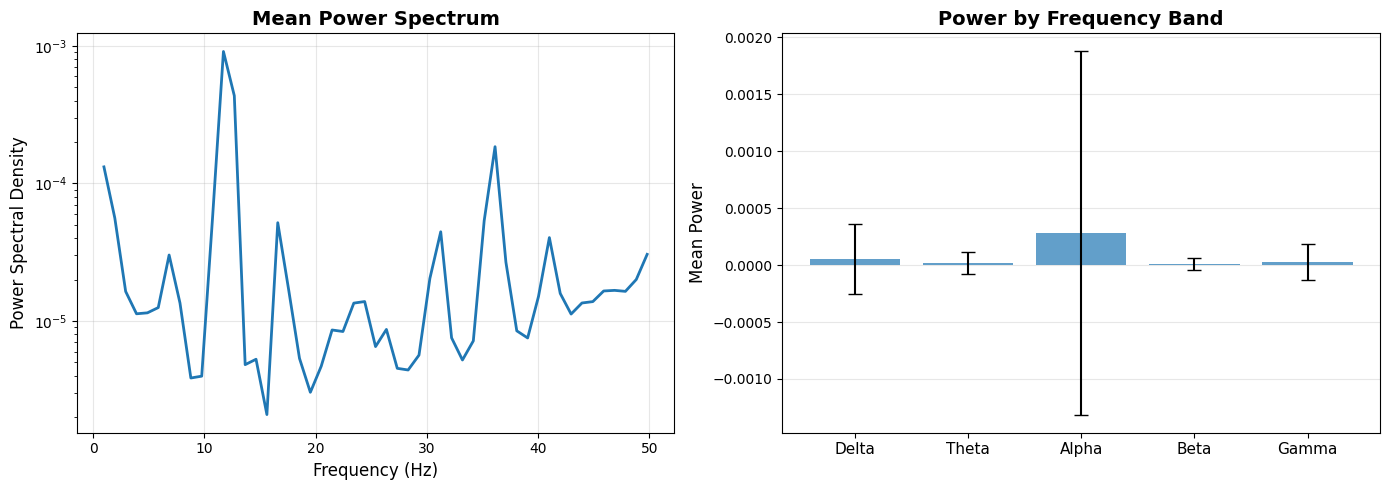

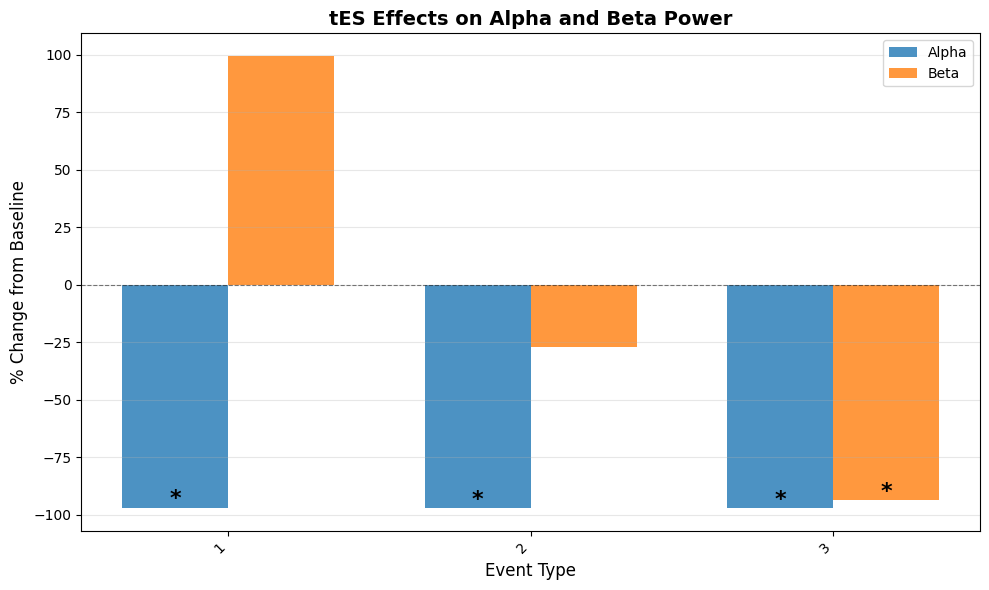

⚠ Limiting to first 3 subjects for memory

ANALYZING: SUB01 - Sess01

QUICK ANALYSIS: SUB01 - Sess01
Channel Summary:
  EEG channels: 33
  ECG channels: 0
  EOG channels: 0

🚀 Running analyses...

1/6 Running spectral analysis...

 EEG Spectral Analysis...
Effective window size : 1.024 (s)
  ✓ Computed spectral features for 33 channels
  ✓ Mean Alpha power: 2.82e-04

2/6 Running entropy analysis...

🔍 EEG Entropy Analysis (Chunked)...
  ✓ Computed entropy for 33 channels
  ✓ Mean Shannon entropy: 3.491

3/6 Running ECG analysis...

 ECG & HRV Analysis...
  ⚠ No ECG channels found

4/6 Running EOG analysis...

  EOG Blink Analysis...
  ⚠ No EOG channels found

5/6 Running tES effects analysis...

 tES Effects Analysis...
  Found 4 unique event types: [1 2 3 4]

  Analyzing event code 1 (9 trials)...
    Alpha: -96.9% (p=0.000*)
    Beta: +99.4% (p=0.255)

  Analyzing event code 2 (6 trials)...
    Alpha: -97.1% (p=0.000*)
    Beta: -26.9% (p=0.753)

  Analyzing event code 3 (9 trials)..

In [ ]:
# Step 1: Load your data (as you already do)
data_dir = r'/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET'
all_sub_data = load_ant_neuro_cnt_evt(dataset_root=data_dir,
                                       subject_id=None,
                                       session_id=None,
                                       verbose=True)

# Step 2: Quick test on one subject
analyzer, results = quick_analysis_single_subject(all_sub_data)

# Step 3: Visualize
plot_spectral_results(analyzer)
plot_tes_effects(analyzer)

# Step 4: Run on all subjects (with memory limit)
all_results = batch_analysis_all_subjects(all_sub_data, max_subjects=3)

In [ ]:
print("time_frequency members:", [n for n in dir(mntf) if not n.startswith("_")])

time_frequency members: ['AverageTFR', 'AverageTFRArray', 'BaseTFR', 'CrossSpectralDensity', 'EpochsSpectrum', 'EpochsSpectrumArray', 'EpochsTFR', 'EpochsTFRArray', 'RawTFR', 'RawTFRArray', 'Spectrum', 'SpectrumArray', 'combine_spectrum', 'combine_tfr', 'csd_array_fourier', 'csd_array_morlet', 'csd_array_multitaper', 'csd_fourier', 'csd_morlet', 'csd_multitaper', 'csd_tfr', 'dpss_windows', 'fit_iir_model_raw', 'fwhm', 'istft', 'morlet', 'pick_channels_csd', 'psd_array_multitaper', 'psd_array_welch', 'read_csd', 'read_spectrum', 'read_tfrs', 'stft', 'stftfreq', 'tfr_array_morlet', 'tfr_array_multitaper', 'tfr_array_stockwell', 'tfr_morlet', 'tfr_multitaper', 'tfr_stockwell', 'write_tfrs']


In [ ]:
print(sub01_Data)

{'SUB02': {'Sess01': {'raw': <RawANT | GX_0201.cnt, 35 x 8477864 (4238.9 s), ~32 KiB, data not loaded>, 'events': array([[      0,       0,       4],
       [  48143,       0,       2],
       [1246129,       0,       2],
       [1248229,       0,       1],
       [1318680,       0,       3],
       [1548224,       0,       1],
       [1618355,       0,       3],
       [1848207,       0,       1],
       [1918469,       0,       3],
       [2148342,       0,       1],
       [2218385,       0,       3],
       [2444241,       0,       2],
       [3642122,       0,       2],
       [3648363,       0,       1],
       [3718811,       0,       3],
       [3948510,       0,       1],
       [4018760,       0,       3],
       [4248394,       0,       1],
       [4318546,       0,       3],
       [4318644,       0,       3],
       [4548375,       0,       1],
       [4618485,       0,       3],
       [4840342,       0,       2],
       [6038276,       0,       2],
       [6048143,      

In [ ]:
print(mne.find_events(sub01_Data['SUB02']['Sess01']['raw']))

ValueError: No stim channels found, but the raw object has annotations. Consider using mne.events_from_annotations to convert these to events.

In [ ]:
pd.read_csv("/content/GX_0101_events.csv")

,timestamp_sec,event_code,event_label
0,3.702783e-297,0,Epoch Event
1,2.426656e-292,0,Epoch Event
2,1.590333e-287,0,Epoch Event
3,1.042241e-282,0,Epoch Event
4,6.830429e-278,0,Epoch Event
5,4.476390e-273,0,Epoch Event
6,2.933647e-268,0,Epoch Event
7,1.922595e-263,0,Epoch Event
8,1.259992e-258,0,Epoch Event
9,8.257482e-254,0,Epoch Event


In [ ]:
import struct
import re
from pathlib import Path

def is_printable_ascii(b):
    return all(32 <= x < 127 for x in b)

def find_printable_string(data, start, min_len=3, max_len=200):
    # find first null-terminated or whitespace-terminated printable string
    for i in range(start, min(start + max_len, len(data))):
        # find a run of printable chars at i
        j = i
        while j < len(data) and 32 <= data[j] < 127:
            j += 1
        if j - i >= min_len:
            return data[i:j].decode('utf-8', errors='ignore'), j
    return None, None

def parse_curry_evt(path):
    data = Path(path).read_bytes()
    key = b"class dcEpochEvent_c"
    events = []

    for idx in [m.start() for m in re.finditer(re.escape(key), data)]:
        # heuristic window: scan forward a bit to find timestamp-like double and small int code
        window_start = idx
        window_end = min(len(data), idx + 512)  # adjust if needed
        found_ts = None
        found_ts_offset = None

        # look for plausible double (8 bytes)
        for pos in range(window_start, window_end - 8):
            # try unpack as little-endian double
            try:
                val = struct.unpack_from("<d", data, pos)[0]
            except struct.error:
                continue
            # plausible timestamp criteria: finite, >=0, <= 1e8 (adjust if needed)
            if not (val != float('inf') and val == val):  # check not inf/nan
                continue
            if 0 <= val <= 1e8:
                found_ts = val
                found_ts_offset = pos
                break

        if found_ts is None:
            # nothing plausible in this small window; skip this block
            continue

        # after timestamp, look for a small int (event code)
        found_code = None
        found_code_offset = None
        scan_start = found_ts_offset + 8
        scan_end = min(len(data), scan_start + 200)
        for pos in range(scan_start, scan_end - 4):
            code = struct.unpack_from("<i", data, pos)[0]
            # plausible event code: small non-negative integer
            if 0 <= code <= 100000:
                # also check that surrounding bytes are not all zero
                found_code = code
                found_code_offset = pos
                break

        # find a readable label string after code (or after timestamp if code not found)
        label_search_start = (found_code_offset + 4) if found_code_offset else (found_ts_offset + 8)
        label, label_end = find_printable_string(data, label_search_start, min_len=2)

        events.append({
            "block_index": idx,
            "ts_offset": found_ts_offset,
            "timestamp": found_ts,
            "code_offset": found_code_offset,
            "code": found_code,
            "label": label or ""
        })

    return events

# Usage
evt_path = "/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.evt"
events = parse_curry_evt(evt_path)

# Print results
if not events:
    print("No events found with current heuristics. You can increase the search window or share a hex sample.")
else:
    for i, e in enumerate(events[:200], 1):
        print(f"{i:03d}: ts_off={e['ts_offset']}, time={e['timestamp']}, code={e['code']}, label='{e['label']}'")

# Optional: create a pandas DataFrame for easier viewing
try:
    import pandas as pd
    df = pd.DataFrame(events)
    print("\nDataFrame preview:")
    print(df.head(20).to_string(index=False))
except Exception:
  pass

001: ts_off=75, time=3.702782993064483e-297, code=0, label='Epoch Event'
002: ts_off=199, time=2.4266558623347395e-292, code=0, label='Epoch Event'
003: ts_off=323, time=1.590333185939695e-287, code=0, label='Epoch Event'
004: ts_off=447, time=1.0422407567374384e-282, code=0, label='Epoch Event'
005: ts_off=571, time=6.830429023354477e-278, code=0, label='Epoch Event'
006: ts_off=695, time=4.47638996474559e-273, code=0, label='Epoch Event'
007: ts_off=819, time=2.9336469272956697e-268, code=0, label='Epoch Event'
008: ts_off=943, time=1.92259485027249e-263, code=0, label='Epoch Event'
009: ts_off=1067, time=1.2599917610745791e-258, code=0, label='Epoch Event'
010: ts_off=1191, time=8.257482005378362e-254, code=0, label='Epoch Event'
011: ts_off=1315, time=5.411623407044763e-249, code=0, label='Epoch Event'
012: ts_off=1439, time=3.546561516040856e-244, code=0, label='Epoch Event'
013: ts_off=1563, time=2.3242745551525354e-239, code=0, label='Epoch Event'
014: ts_off=1687, time=1.523236

In [ ]:
import struct
import re
import pandas as pd
from pathlib import Path

def is_printable_ascii(b):
    return all(32 <= x < 127 for x in b)

def find_printable_string(data, start, min_len=3, max_len=200):
    for i in range(start, min(start + max_len, len(data))):
        j = i
        while j < len(data) and 32 <= data[j] < 127:
            j += 1
        if j - i >= min_len:
            return data[i:j].decode('utf-8', errors='ignore'), j
    return None, None

def parse_curry_evt(path):
    data = Path(path).read_bytes()
    key = b"class dcEpochEvent_c"
    events = []

    # find all event blocks
    positions = [m.start() for m in re.finditer(re.escape(key), data)]

    for idx in positions:
        window_start = idx
        window_end = min(len(data), idx + 512)

        # --- find timestamp (8-byte double) ---
        timestamp = None
        ts_offset = None
        for pos in range(window_start, window_end - 8):
            try:
                val = struct.unpack_from("<d", data, pos)[0]
            except:
                continue
            if 0 <= val <= 1e8 and val == val:
                timestamp = val
                ts_offset = pos
                break

        if timestamp is None:
            continue

        # --- find event code (small int) after timestamp ---
        code = None
        code_offset = None
        scan_start = ts_offset + 8
        scan_end = min(len(data), scan_start + 200)

        for pos in range(scan_start, scan_end - 4):
            val = struct.unpack_from("<i", data, pos)[0]
            if 0 <= val <= 100000:
                code = val
                code_offset = pos
                break

        # --- find label ---
        label_start = (code_offset + 4) if code_offset else (ts_offset + 8)
        label, _ = find_printable_string(data, label_start, min_len=2)

        events.append({
            "timestamp_sec": timestamp,
            "event_code": code,
            "event_label": label or ""
        })

    return events


# ------------------------------------------------------------
# RUN THE CONVERTER
# ------------------------------------------------------------
evt_path = "/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.evt"   # <-- update if needed
output_csv = "GX_0101_events.csv"

events = parse_curry_evt(evt_path)

df = pd.DataFrame(events)
df.to_csv(output_csv, index=False)

print(f"Saved {len(df)} events to {output_csv}")
print(df.head(10))

Saved 24 events to GX_0101_events.csv
   timestamp_sec  event_code  event_label
0  3.702783e-297           0  Epoch Event
1  2.426656e-292           0  Epoch Event
2  1.590333e-287           0  Epoch Event
3  1.042241e-282           0  Epoch Event
4  6.830429e-278           0  Epoch Event
5  4.476390e-273           0  Epoch Event
6  2.933647e-268           0  Epoch Event
7  1.922595e-263           0  Epoch Event
8  1.259992e-258           0  Epoch Event
9  8.257482e-254           0  Epoch Event


In [ ]:
# with open("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt", "rb") as f:
#     head = f.read(512)
# print(head[:100])

# events = mne.read_events("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.evt")
# print(events)

data = mne.io.read_raw_ant("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt", preload=True)
print("DATA:", data)

Reading ANT file /content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt
Reading 0 ... 8455575  =      0.000 ...  4227.788 secs...


/tmp/ipython-input-2490809213.py:8: RuntimeWarning: All EEG channels are not referenced to the same electrode.
  data = mne.io.read_raw_ant("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt", preload=True)
/tmp/ipython-input-2490809213.py:8: RuntimeWarning: Unit % not recognized, not scaling. Please report the unit on a github issue on https://github.com/mne-tools/mne-python.
  data = mne.io.read_raw_ant("/content/drive/MyDrive/Neuroinfo_Assignment/Concurrent_EegEcgEog_under_tES/Concur_EegEcgEog_under_tES_DATASET/SUB01/GX_0101.cnt", preload=True)


DATA: <RawANT | GX_0101.cnt, 35 x 8455576 (4227.8 s), ~2.20 GiB, data loaded>


In [ ]:
# ======================
# Perplexity code
# ======================

def load_ant_neuro_cnt_evt(dataset_root: str,
                           subject_id: str = None,
                           session_id: str = None,
                           verbose: bool = True) -> Dict:
    """
    Load ANT Neuro .cnt and .evt files from BIDS-like sourcedata structure.

    Parameters
    ----------
    dataset_root : str
        Path to dataset root directory
    subject_id : str, optional
        Specific subject to load (e.g., '001'). If None, loads all subjects.
    session_id : str, optional
        Specific session to load (e.g., '01'). If None, loads all sessions.
    verbose : bool
        Print loading progress

    Returns
    -------
    data : dict
        Dictionary with structure:
        {
            'sub-001': {
                'ses-01': {
                    'raw': mne.io.Raw object,
                    'events': numpy array (shape: n_events x 3),
                    'event_id': dict,
                    'metadata': dict
                },
                'ses-02': {...}
            },
            'sub-002': {...}
        }
    """

    dataset_root = Path(dataset_root)
    sourcedata_dir = dataset_root / 'sourcedata'

    if not sourcedata_dir.exists():
        raise FileNotFoundError(f"Sourcedata directory not found: {sourcedata_dir}")

    # Initialize output dictionary
    data = {}

    # Get all subject directories
    if subject_id:
        subject_dirs = [sourcedata_dir / f'sub-{subject_id}']
    else:
        subject_dirs = sorted([d for d in sourcedata_dir.iterdir()
                              if d.is_dir() and d.name.startswith('sub-')])

    # Iterate over subjects
    for sub_dir in subject_dirs:
        sub_id = sub_dir.name

        if verbose:
            print(f"\n{'='*60}")
            print(f"Loading {sub_id}")
            print(f"{'='*60}")

        data[sub_id] = {}

        # Get all session directories
        if session_id:
            session_dirs = [sub_dir / f'ses-{session_id}']
        else:
            session_dirs = sorted([d for d in sub_dir.iterdir()
                                  if d.is_dir() and d.name.startswith('ses-')])

        # Iterate over sessions
        for ses_dir in session_dirs:
            ses_id = ses_dir.name

            if verbose:
                print(f"\n  → {ses_id}")

            # Look for EEG data in eeg subdirectory
            eeg_dir = ses_dir / 'eeg'

            if not eeg_dir.exists():
                if verbose:
                    print(f"    [WARNING] No 'eeg' directory found in {ses_dir}")
                continue

            # Find all .cnt files in this session
            cnt_files = list(eeg_dir.glob('*.cnt'))

            if len(cnt_files) == 0:
                if verbose:
                    print(f"    [WARNING] No .cnt files found in {eeg_dir}")
                continue

            # Load each .cnt file (may be multiple runs/blocks)
            data[sub_id][ses_id] = []

            for cnt_file in sorted(cnt_files):
                if verbose:
                    print(f"    Loading: {cnt_file.name}")

                # Load .cnt file using MNE
                try:
                    raw = mne.io.read_raw_cnt(
                        str(cnt_file),
                        preload=True,
                        verbose='ERROR'
                    )

                    if verbose:
                        print(f"      ✓ EEG loaded: {len(raw.ch_names)} channels, "
                              f"{raw.n_times} samples, {raw.info['sfreq']} Hz")

                except Exception as e:
                    if verbose:
                        print(f"      ✗ Error loading {cnt_file.name}: {e}")
                    continue

                # Find corresponding .evt file
                evt_file = cnt_file.with_suffix('.evt')

                events = None
                event_id = None

                if evt_file.exists():
                    try:
                        # Read .evt file (ANT Neuro binary event format)
                        events = mne.read_events(str(evt_file))

                        # Create event_id dictionary from unique event codes
                        unique_codes = np.unique(events[:, 2])
                        event_id = {f"event_{code}": code for code in unique_codes}

                        if verbose:
                            print(f"      ✓ Events loaded: {len(events)} events, "
                                  f"{len(unique_codes)} unique codes")
                            print(f"        Event codes: {unique_codes}")

                    except Exception as e:
                        if verbose:
                            print(f"      ✗ Error loading {evt_file.name}: {e}")
                        events = None
                        event_id = None
                else:
                    if verbose:
                        print(f"      [INFO] No .evt file found for {cnt_file.name}")

                # Store metadata
                metadata = {
                    'filename': cnt_file.name,
                    'evt_filename': evt_file.name if evt_file.exists() else None,
                    'n_channels': len(raw.ch_names),
                    'n_samples': raw.n_times,
                    'sfreq': raw.info['sfreq'],
                    'duration': raw.times[-1],
                    'ch_names': raw.ch_names
                }

                # Append to session data
                data[sub_id][ses_id].append({
                    'raw': raw,
                    'events': events,
                    'event_id': event_id,
                    'metadata': metadata
                })

    if verbose:
        print(f"\n{'='*60}")
        print(f"Loading complete!")
        print(f"{'='*60}\n")

    return data


def extract_events_from_cnt(data: Dict,
                             save_to_tsv: bool = True,
                             output_dir: str = None) -> Dict:
    """
    Extract events from loaded data and optionally save to BIDS-compliant TSV.

    Parameters
    ----------
    data : dict
        Output from load_ant_neuro_cnt_evt()
    save_to_tsv : bool
        Save events to .tsv files
    output_dir : str
        Output directory for TSV files (default: dataset_root/derivatives)

    Returns
    -------
    events_summary : dict
        Dictionary with event summaries per subject/session
    """

    events_summary = {}

    for sub_id, sessions in data.items():
        events_summary[sub_id] = {}

        for ses_id, recordings in sessions.items():
            events_summary[sub_id][ses_id] = []

            for idx, rec in enumerate(recordings):
                events = rec['events']

                if events is None:
                    continue

                # Convert MNE events to BIDS-style dataframe
                events_df = pd.DataFrame({
                    'onset': events[:, 0] / rec['metadata']['sfreq'],  # Convert samples to seconds
                    'duration': 0,  # Instantaneous events
                    'trial_type': [f"event_{code}" for code in events[:, 2]],
                    'value': events[:, 2]
                })

                events_summary[sub_id][ses_id].append(events_df)

                # Save to TSV if requested
                if save_to_tsv and output_dir:
                    output_path = Path(output_dir) / sub_id / ses_id / 'eeg'
                    output_path.mkdir(parents=True, exist_ok=True)

                    filename_base = rec['metadata']['filename'].replace('.cnt', '')
                    tsv_file = output_path / f"{filename_base}_events.tsv"

                    events_df.to_csv(tsv_file, sep='\t', index=False)
                    print(f"Saved: {tsv_file}")

    return events_summary


def get_data_summary(data: Dict) -> pd.DataFrame:
    """
    Generate summary table of loaded data.

    Parameters
    ----------
    data : dict
        Output from load_ant_neuro_cnt_evt()

    Returns
    -------
    summary : pd.DataFrame
        Summary table with subject, session, n_channels, duration, etc.
    """

    summary_list = []

    for sub_id, sessions in data.items():
        for ses_id, recordings in sessions.items():
            for rec in recordings:
                meta = rec['metadata']
                n_events = len(rec['events']) if rec['events'] is not None else 0

                summary_list.append({
                    'subject': sub_id,
                    'session': ses_id,
                    'filename': meta['filename'],
                    'n_channels': meta['n_channels'],
                    'sfreq': meta['sfreq'],
                    'duration_sec': meta['duration'],
                    'n_events': n_events,
                    'has_events': rec['events'] is not None
                })

    return pd.DataFrame(summary_list)


# ============================================================================
# Example Usage
# ============================================================================

if __name__ == '__main__':

    # Set dataset root directory
    dataset_root = '/path/to/your/dataset'  # CHANGE THIS

    # -------------------------------------------------------------------
    # OPTION 1: Load all subjects and sessions
    # -------------------------------------------------------------------
    print("\n=== Loading ALL subjects and sessions ===\n")
    data_all = load_ant_neuro_cnt_evt(dataset_root, verbose=True)

    # Get summary
    summary = get_data_summary(data_all)
    print("\n=== Data Summary ===")
    print(summary)

    # -------------------------------------------------------------------
    # OPTION 2: Load specific subject
    # -------------------------------------------------------------------
    print("\n\n=== Loading ONLY sub-001 ===\n")
    data_sub001 = load_ant_neuro_cnt_evt(
        dataset_root,
        subject_id='001',
        verbose=True
    )

    # -------------------------------------------------------------------
    # OPTION 3: Load specific subject and session
    # -------------------------------------------------------------------
    print("\n\n=== Loading ONLY sub-001, ses-01 ===\n")
    data_sub001_ses01 = load_ant_neuro_cnt_evt(
        dataset_root,
        subject_id='001',
        session_id='01',
        verbose=True
    )

    # -------------------------------------------------------------------
    # Access data for a specific subject/session/recording
    # -------------------------------------------------------------------
    print("\n\n=== Accessing specific recording ===\n")

    # Navigate structure: data[subject][session][recording_index]
    sub_id = 'sub-001'
    ses_id = 'ses-01'
    rec_idx = 0  # First recording in this session

    if sub_id in data_all and ses_id in data_all[sub_id]:
        recording = data_all[sub_id][ses_id][rec_idx]

        raw = recording['raw']
        events = recording['events']
        event_id = recording['event_id']

        print(f"Raw data shape: {raw.get_data().shape}")
        print(f"Channel names: {raw.ch_names}")
        print(f"Sampling frequency: {raw.info['sfreq']} Hz")

        if events is not None:
            print(f"\nNumber of events: {len(events)}")
            print(f"Event codes: {event_id}")
            print(f"\nFirst 5 events:")
            print(events[:5])

    # -------------------------------------------------------------------
    # Extract and save events to BIDS-compliant TSV
    # -------------------------------------------------------------------
    print("\n\n=== Extracting events to TSV ===\n")

    events_summary = extract_events_from_cnt(
        data_all,
        save_to_tsv=True,
        output_dir=f"{dataset_root}/derivatives"
    )

    # -------------------------------------------------------------------
    # Plot example data
    # -------------------------------------------------------------------
    print("\n\n=== Plotting example recording ===\n")

    if sub_id in data_all and ses_id in data_all[sub_id]:
        recording = data_all[sub_id][ses_id][rec_idx]
        raw = recording['raw']
        events = recording['events']

        # Plot raw data with events
        raw.plot(
            duration=10,
            n_channels=32,
            scalings='auto',
            events=events,
            title=f"{sub_id} {ses_id} - First 10 seconds"
        )

        # Plot power spectral density
        raw.plot_psd(fmax=50)


In [ ]:
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets
from copy import deepcopy

# ---------------------------------------------------------
# Utility functions
# ---------------------------------------------------------
def get_unique_values(EEG_list, field):
    vals = set()
    for eeg in EEG_list:
        for ev in eeg["event"]:
            if field in ev:
                vals.add(str(ev[field]))
    return sorted(vals)


def checkFormat(s):
    try:
        float(s)
        return f"x{s}"
    except:
        return s.replace(" ", "_")


In [ ]:
def build_initial_eventBIDS(EEG_list, defaults):
    eventBIDS = {}
    event_fields = list(EEG_list[0]["event"][0].keys())

    for bf in defaults:
        if bf == "onset":
            eventBIDS[bf] = {
                "EEGField": "From sample",
                "LongName": "Event onset",
                "Description": "Onset of the event (in seconds)",
                "Units": "second",
                "Levels": {},
                "TermURL": ""
            }
        elif bf == "sample":
            eventBIDS[bf] = {
                "EEGField": "latency",
                "LongName": "Sample index",
                "Description": "Event onset in sample units",
                "Units": "",
                "Levels": {},
                "TermURL": ""
            }
        elif bf == "value":
            eventBIDS[bf] = {
                "EEGField": "type",
                "LongName": "Event marker",
                "Description": "EEGLAB event type",
                "Units": "",
                "Levels": {},
                "TermURL": ""
            }
        else:
            eventBIDS[bf] = {
                "EEGField": "",
                "LongName": "",
                "Description": "",
                "Units": "",
                "Levels": {},
                "TermURL": ""
            }

    return eventBIDS


In [ ]:
def pop_eventinfo_ipy(EEG):

    if isinstance(EEG, dict):
        EEG_list = [EEG]
    else:
        EEG_list = EEG

    bids_defaults = ["onset","duration","trial_type","value","stim_file","sample","response_time","HED"]

    eventBIDS = build_initial_eventBIDS(EEG_list, bids_defaults)

    # ---------------------------
    # Create DataFrame UI
    # ---------------------------
    df = pd.DataFrame([
        {
            "BIDS Field": k,
            "EEGLAB Field": v["EEGField"],
            "LongName": v["LongName"],
            "Description": v["Description"],
            "Units": v["Units"],
            "Levels": ",".join(v["Levels"].keys()) if v["Levels"] else "",
            "TermURL": v["TermURL"]
        }
        for k, v in eventBIDS.items()
    ])

    output = widgets.Output()

    # widgets
    table_widget = widgets.Output()

    def refresh_table():
        with table_widget:
            clear_output()
            display(df)

    refresh_table()

    # ---------------------------
    # LEVEL EDITOR
    # ---------------------------
    def open_levels_editor(bids_field):
        with output:
            clear_output()
            print(f"Editing levels for: {bids_field}")

        eeg_field = eventBIDS[bids_field]["EEGField"]
        if eeg_field == "":
            with output:
                print("Please select EEGLAB field first.")
            return

        unique_vals = get_unique_values(EEG_list, eeg_field)
        formatted_vals = [checkFormat(v) for v in unique_vals]

        # Build level table
        level_desc = eventBIDS[bids_field]["Levels"] or {}

        rows = []
        for v in formatted_vals:
            rows.append([v, level_desc.get(v, "")])

        lvl_df = pd.DataFrame(rows, columns=["Level", "Description"])

        # Editable table using Text widgets
        lvl_widgets = []
        for i, row in lvl_df.iterrows():
            lvl_widgets.append([
                widgets.Label(row["Level"]),
                widgets.Text(value=row["Description"])
            ])

        grid = widgets.GridBox(
            children=[item for pair in lvl_widgets for item in pair],
            layout=widgets.Layout(grid_template_columns="150px 400px")
        )

        save_btn = widgets.Button(description="Save Levels", button_style='success')

        def save_levels(_):
            new_levels = {}
            for i, (label, text) in enumerate(lvl_widgets):
                new_levels[label.value] = text.value

            eventBIDS[bids_field]["Levels"] = new_levels
            df.loc[df["BIDS Field"] == bids_field, "Levels"] = ",".join(new_levels.keys())
            refresh_table()

            with output:
                clear_output()
                print("Levels saved.")

        save_btn.on_click(save_levels)

        with output:
            display(grid, save_btn)

    # ---------------------------
    # FIELD DETAIL EDITOR
    # ---------------------------
    def edit_field_dialog(bids_field):
        col_widgets = {}

        for col in ["EEGLAB Field","LongName","Description","Units","TermURL"]:
            col_widgets[col] = widgets.Text(
                value=df.loc[df["BIDS Field"] == bids_field, col].values[0],
                description=col
            )

        save_btn = widgets.Button(description="Save", button_style='primary')

        def save_changes(_):
            for col, widget in col_widgets.items():
                df.loc[df["BIDS Field"] == bids_field, col] = widget.value
                eventBIDS[bids_field][col.replace(" ","")] = widget.value

            refresh_table()
            with output:
                clear_output()
                print(f"Updated {bids_field}")

        save_btn.on_click(save_changes)

        with output:
            clear_output()
            for w in col_widgets.values():
                display(w)
            display(save_btn)

    # ---------------------------
    # BUTTONS
    # ---------------------------

    select_field = widgets.Dropdown(
        options=df["BIDS Field"].tolist(),
        description="Field:"
    )

    edit_btn = widgets.Button(description="Edit Field")
    lvl_btn = widgets.Button(description="Edit Levels")
    add_btn = widgets.Button(description="Add Field")
    remove_btn = widgets.Button(description="Remove Field")
    finish_btn = widgets.Button(description="Finish", button_style='success')

    def on_edit(_):
        edit_field_dialog(select_field.value)

    def on_edit_levels(_):
        open_levels_editor(select_field.value)

    def on_add(_):
        new_name = widgets.Text(description="New field:")
        ok = widgets.Button(description="Add", button_style='success')

        def add_final(_):
            name = new_name.value.strip()
            if name == "":
                return
            eventBIDS[name] = {"EEGField":"","LongName":"","Description":"","Units":"","Levels":{},"TermURL":""}
            df.loc[len(df)] = [name,"","","","","",""]
            select_field.options = df["BIDS Field"].tolist()
            refresh_table()
            with output:
                clear_output()
                print("Added:", name)

        ok.on_click(add_final)
        with output:
            clear_output()
            display(new_name, ok)

    def on_remove(_):
        field = select_field.value
        if field in bids_defaults:
            with output:
                clear_output()
                print("Cannot remove default BIDS field.")
            return

        df.drop(df[df["BIDS Field"] == field].index, inplace=True)
        df.reset_index(drop=True, inplace=True)
        eventBIDS.pop(field, None)
        select_field.options = df["BIDS Field"].tolist()
        refresh_table()

        with output:
            clear_output()
            print("Removed:", field)

    def on_finish(_):
        with output:
            clear_output()
            print("Completed. Returning BIDS structures.")

    edit_btn.on_click(on_edit)
    lvl_btn.on_click(on_edit_levels)
    add_btn.on_click(on_add)
    remove_btn.on_click(on_remove)
    finish_btn.on_click(on_finish)

    ui = widgets.VBox([
        table_widget,
        widgets.HBox([select_field, edit_btn, lvl_btn]),
        widgets.HBox([add_btn, remove_btn, finish_btn]),
        output
    ])

    display(ui)

    return df, eventBIDS


In [ ]:
EEG = {
    "event": [
        {"latency": 10, "type": "A", "duration": 1},
        {"latency": 50, "type": "B", "duration": 1},
        {"latency": 90, "type": "A", "duration": 2}
    ]
}

df, eventBIDS = pop_eventinfo_ipy(EEG)


In [ ]:
"""
pop_eventinfo.py - Python (tkinter) equivalent of MATLAB pop_eventinfo

Usage:
    EEGs, command, eInfoDesc, eInfo = pop_eventinfo(EEGs, default=False)

EEG representation (expected):
    EEGs: list of dicts. Each EEG dict should have:
       - 'event': list of event dicts (each event is a dict with fields like 'latency','type', etc.)
       - optional 'BIDS' dict (with eInfoDesc and eInfo)
       - optional 'history' (list) and 'saved' flag used/updated by this function

Returns:
    EEGs (possibly updated), command (string), eInfoDesc (dict), eInfo (list of [bidsField,eegField])
"""
import tkinter as tk
from tkinter import ttk, simpledialog, messagebox
from copy import deepcopy
from collections import OrderedDict

def pop_eventinfo(EEG, default=False):
    """
    EEG: list of EEG dicts OR a single EEG dict
    default: if True, don't launch GUI; use default values and return.
    Returns: EEG (same type as input), command, eInfoDesc, eInfo
    """

    # normalize to list-of-dicts
    single_input = False
    if isinstance(EEG, dict):
        EEGs = [EEG]
        single_input = True
    elif isinstance(EEG, list):
        EEGs = EEG
    else:
        raise ValueError("EEG must be a dict or list of dicts")

    # -- checks --
    if len(EEGs) == 0 or 'event' not in EEGs[0] or not EEGs[0]['event']:
        raise ValueError("EEG.event is empty for first dataset")

    # gather event fields from EEG.event (take union; prefer the EEG with most fields)
    try:
        # find event which has the most fields (like MATLAB logic)
        max_fields = -1
        best_idx = 0
        for idx, e in enumerate(EEGs):
            if 'event' in e and e['event']:
                fcount = len(e['event'][0].keys())
                if fcount > max_fields:
                    max_fields = fcount
                    best_idx = idx
        eventFields = list(EEGs[best_idx]['event'][0].keys())
    except Exception as ex:
        raise RuntimeError("Error reading EEG.event fields: " + str(ex))

    # default BIDS fields
    bidsFields_default = ['onset', 'duration', 'trial_type', 'value',
                          'stim_file', 'sample', 'response_time', 'HED']

    # remove 'latency' if present (MATLAB did this)
    if 'latency' in eventFields:
        eventFields.remove('latency')

    # build eventBIDS structure (function newEventBIDS)
    eventBIDS = newEventBIDS(EEGs, eventFields, bidsFields_default)

    # if default requested, skip GUI and return done()
    command = "pop_eventinfo(EEG)"
    if default:
        EEGs, eInfoDesc, eInfo = done_and_attach(EEGs, eventBIDS, command)
        return (EEGs[0] if single_input else EEGs), command, eInfoDesc, eInfo

    # Launch GUI (tkinter)
    app = PopEventInfoApp(EEGs, eventFields, eventBIDS, bidsFields_default)
    # app runs mainloop until closed; after done, it sets app.result_eventBIDS and app.finished flags
    app.run()

    # if user cancelled, app.result_eventBIDS may be None
    if getattr(app, "result_eventBIDS", None) is None:
        # cancel -> return unchanged EEG and no eInfo/eInfoDesc
        return (EEGs[0] if single_input else EEGs), command, None, None

    EEGs, eInfoDesc, eInfo = done_and_attach(EEGs, app.result_eventBIDS, command)
    return (EEGs[0] if single_input else EEGs), command, eInfoDesc, eInfo


# ------------------------
# helper functions & classes
# ------------------------

def done_and_attach(EEGs, eventBIDS, command):
    """
    Build eInfoDesc and eInfo from eventBIDS and attach to each EEG in EEGs
    """
    eInfoDesc = {}
    eInfo = []

    # default fields auto-generated by EEGLAB
    eInfoDesc['duration'] = {'LongName': 'Event duration',
                             'Description': 'Duration of the event (measured from onset) in seconds',
                             'Units': 'second'}
    eInfoDesc['sample'] = {'LongName': 'Sample',
                           'Description': 'Onset of the event according to the sampling scheme of the recorded modality (i.e., referring to the raw data file that the events.tsv file accompanies).'}
    eInfoDesc['trial_type'] = {'LongName': 'Event categorization',
                               'Description': 'Primary categorisation of each trial to identify them as instances of the experimental conditions.'}
    eInfoDesc['response_time'] = {'LongName': 'Response time',
                                  'Description': 'Response time measued in seconds.',
                                  'Units': 'second'}
    eInfoDesc['stim_file'] = {'LongName': 'Stimulus file location',
                              'Description': 'Represents the location of the stimulus file (image, video, sound etc.) presented at the given onset time. They should be stored in the /stimuli folder (under the root folder of the dataset; with optional subfolders). The values under the stim_file column correspond to a path relative to "/stimuli".'}

    # prepare return struct based on eventBIDS
    for bidsField, desc in eventBIDS.items():
        eegField = desc.get('EEGField', '')
        if eegField:
            if bidsField not in ('onset', 'sample'):
                eInfo.append([bidsField, eegField])
            # copy optional properties
            if desc.get('LongName'):
                eInfoDesc.setdefault(bidsField, {})['LongName'] = desc['LongName']
            if desc.get('Description'):
                eInfoDesc.setdefault(bidsField, {})['Description'] = desc['Description']
            if desc.get('Units'):
                eInfoDesc.setdefault(bidsField, {})['Units'] = desc['Units']
            if desc.get('Levels') and desc.get('Levels') != 'n/a':
                eInfoDesc.setdefault(bidsField, {})['Levels'] = desc['Levels']
            if desc.get('TermURL'):
                eInfoDesc.setdefault(bidsField, {})['TermURL'] = desc['TermURL']

    # attach to EEGs
    for e in EEGs:
        if 'BIDS' not in e or not isinstance(e['BIDS'], dict):
            e['BIDS'] = {}
        e['BIDS']['eInfoDesc'] = deepcopy(eInfoDesc)
        e['BIDS']['eInfo'] = deepcopy(eInfo)
        e['saved'] = 'no'
        e.setdefault('history', [])
        e['history'].append(command)

    return EEGs, eInfoDesc, eInfo


def newEventBIDS(EEGs, eventFields, bidsFields):
    """
    Build event dict structure similar to MATLAB function:
       event[bidsField] = {
            'EEGField', 'LongName', 'Description', 'Units', 'Levels', 'TermURL'
       }
    If EEGs contains previous BIDS info, resume from it.
    """
    event = OrderedDict()
    bidsEEG = None
    # look for existing BIDS info
    bidsIdx = [i for i, e in enumerate(EEGs) if 'BIDS' in e and e['BIDS']]
    if bidsIdx:
        bidsEEG = EEGs[bidsIdx[0]]

    if bidsEEG and isinstance(bidsEEG.get('BIDS', {}).get('eInfoDesc', None), dict) and isinstance(bidsEEG.get('BIDS', {}).get('eInfo', None), list):
        prev_bids_fields = list(bidsEEG['BIDS']['eInfoDesc'].keys())
        for bids_field in prev_bids_fields:
            # find matching eeg field from eInfo
            eeg_field = ''
            for pair in bidsEEG['BIDS'].get('eInfo', []):
                if pair[0] == bids_field:
                    eeg_field = pair[1]
                    break
            if bids_field == 'onset':
                event[bids_field] = {'EEGField': 'From sample'}
            elif bids_field == 'sample':
                event[bids_field] = {'EEGField': 'latency'}
            else:
                event[bids_field] = {'EEGField': eeg_field}
            # copy other BIDS info
            prevdesc = bidsEEG['BIDS']['eInfoDesc'].get(bids_field, {})
            event[bids_field]['LongName'] = prevdesc.get('LongName', '')
            event[bids_field]['Description'] = prevdesc.get('Description', '')
            event[bids_field]['Units'] = prevdesc.get('Units', '')
            event[bids_field]['Levels'] = deepcopy(prevdesc.get('Levels', []))
            event[bids_field]['TermURL'] = prevdesc.get('TermURL', '')
        # add any default bidsFields that weren't present
        for bf in [b for b in bidsFields if b not in event]:
            event[bf] = {'EEGField': '', 'LongName': '', 'Description': '', 'Units': '', 'Levels': [], 'TermURL': ''}
    else:
        # start fresh
        for bf in bidsFields:
            if bf == 'onset':
                event['onset'] = {
                    'EEGField': 'From sample',
                    'LongName': 'Event onset',
                    'Description': 'Onset (in seconds) of the event measured from the beginning of the acquisition of the first volume in the corresponding task imaging data file',
                    'Units': 'second',
                    'Levels': [],
                    'TermURL': ''
                }
            elif bf == 'sample':
                event['sample'] = {
                    'EEGField': 'latency',
                    'LongName': 'Sample',
                    'Description': 'Onset of the event according to the sampling scheme of the recorded modality',
                    'Units': '',
                    'Levels': [],
                    'TermURL': ''
                }
            elif bf == 'value':
                event['value'] = {
                    'EEGField': 'type',
                    'LongName': 'Event marker',
                    'Description': 'Marker value associated with the event',
                    'Units': '',
                    'Levels': [],
                    'TermURL': ''
                }
            elif bf == 'HED' and 'usertags' in eventFields:
                event['HED'] = {
                    'EEGField': 'usertags' if 'usertags' in EEGs[0]['event'][0] else '',
                    'LongName': 'Hierarchical Event Descriptor',
                    'Description': 'Tags describing the nature of the event',
                    'Levels': [],
                    'Units': '',
                    'TermURL': ''
                }
            elif bf == 'duration':
                event['duration'] = {
                    'EEGField': 'duration' if 'duration' in EEGs[0]['event'][0] else '',
                    'LongName': 'Event duration',
                    'Description': 'Duration of the event (measured from onset) in seconds. Must always be either zero or positive. A "duration" value of zero implies that the delta function or event is so short as to be effectively modeled as an impulse.',
                    'Units': 'second',
                    'Levels': [],
                    'TermURL': ''
                }
            else:
                event[bf] = {'EEGField': '', 'LongName': '', 'Description': '', 'Units': '', 'Levels': [], 'TermURL': ''}
    return event


class PopEventInfoApp:
    """
    tkinter GUI application to allow editing of eventBIDS mapping
    """

    def __init__(self, EEGs, eventFields, eventBIDS, bidsFields_default):
        self.EEGs = EEGs
        self.eventFields = eventFields
        self.eventBIDS = eventBIDS  # dict
        self.bidsFields_default = bidsFields_default

        self.root = tk.Tk()
        self.root.title("Edit BIDS event info - pop_eventinfo")
        # medium size
        self.root.geometry("900x550")
        self.finished = False
        self.result_eventBIDS = None

        # build UI
        self._build_widgets()

    def _build_widgets(self):
        # header
        header = tk.Label(self.root, text="BIDS information for EEG.event fields", font=("TkDefaultFont", 12, "bold"))
        header.pack(side=tk.TOP, fill=tk.X, pady=6)

        # treeview table
        columns = ('bids', 'eegfield', 'levels', 'longname', 'description', 'unit_name', 'unit_pref', 'termurl')
        self.tree = ttk.Treeview(self.root, columns=columns, show='headings', selectmode='browse')
        col_names = {
            'bids': 'BIDS Field',
            'eegfield': 'EEGLAB Field',
            'levels': 'Levels',
            'longname': 'LongName',
            'description': 'Description',
            'unit_name': 'Unit Name',
            'unit_pref': 'Unit Prefix',
            'termurl': 'TermURL'
        }
        for c in columns:
            self.tree.heading(c, text=col_names[c])
            # set widths
            if c in ('bids', 'eegfield', 'levels'):
                self.tree.column(c, width=110, anchor='w')
            elif c in ('unit_name', 'unit_pref', 'termurl'):
                self.tree.column(c, width=120, anchor='w')
            else:
                self.tree.column(c, width=220, anchor='w')

        self.tree.bind("<Double-1>", self.on_double_click)
        self.tree.pack(side=tk.TOP, fill=tk.BOTH, expand=True, padx=6, pady=4)

        # control buttons frame
        btn_frame = tk.Frame(self.root)
        btn_frame.pack(side=tk.BOTTOM, fill=tk.X, padx=6, pady=6)

        self.add_btn = tk.Button(btn_frame, text="Add BIDS field", command=self.add_field_dialog)
        self.add_btn.pack(side=tk.LEFT, padx=3)
        self.remove_btn = tk.Button(btn_frame, text="Remove BIDS field", command=self.remove_field_dialog)
        self.remove_btn.pack(side=tk.LEFT, padx=3)

        spacer = tk.Frame(btn_frame)
        spacer.pack(side=tk.LEFT, expand=True)

        self.ok_btn = tk.Button(btn_frame, text="OK", command=self.ok)
        self.ok_btn.pack(side=tk.RIGHT, padx=3)
        self.cancel_btn = tk.Button(btn_frame, text="Cancel", command=self.cancel)
        self.cancel_btn.pack(side=tk.RIGHT, padx=3)

        # populate table
        self._populate_tree()

    def _populate_tree(self):
        # clear
        for r in self.tree.get_children():
            self.tree.delete(r)

        for bids_field, props in self.eventBIDS.items():
            eegfield = props.get('EEGField', '')
            longname = props.get('LongName', '')
            desc = props.get('Description', '')
            units = props.get('Units', '')
            termurl = props.get('TermURL', '')
            levels = props.get('Levels', [])
            if levels == [] or levels is None:
                if bids_field in ('onset', 'sample', 'duration', 'HED'):
                    levels_str = 'n/a'
                else:
                    levels_str = 'Click to specify below'
            elif isinstance(levels, dict):
                levels_str = ','.join(levels.keys())
            elif isinstance(levels, list):
                levels_str = ','.join(levels)
            else:
                levels_str = str(levels)
            # split units into prefix+name if possible: assume prefix is known list
            unit_prefixes = ['deci','centi','milli','micro','nano','pico','femto','atto','zepto','yocto','deca','hecto','kilo','mega','giga','tera','peta','exa','zetta','yotta']
            unit_name = units
            unit_pref = ''
            for up in unit_prefixes:
                if isinstance(units, str) and units.startswith(up):
                    unit_pref = up
                    unit_name = units[len(up):]
                    break

            vals = (bids_field, eegfield, levels_str, longname, desc, unit_name, unit_pref, termurl)
            self.tree.insert('', tk.END, values=vals)

    def run(self):
        self.root.protocol("WM_DELETE_WINDOW", self.cancel)
        self.root.mainloop()

    def cancel(self):
        # just close and leave result_eventBIDS None
        self.result_eventBIDS = None
        self.finished = True
        self.root.destroy()

    def ok(self):
        # return eventBIDS
        # Update eventBIDS from current tree contents (to capture any in-tree edits)
        for iid in self.tree.get_children():
            row = self.tree.item(iid)['values']
            bids_field = row[0]
            if bids_field in self.eventBIDS:
                self.eventBIDS[bids_field]['EEGField'] = row[1]
                # Levels are set via level editor; but also keep textual summary
                # try to keep Units from prefix+name
                prefix = row[6] if row[6] else ''
                name = row[5] if row[5] else ''
                self.eventBIDS[bids_field]['Units'] = (prefix + name).strip()
                self.eventBIDS[bids_field]['LongName'] = row[3]
                self.eventBIDS[bids_field]['Description'] = row[4]
                self.eventBIDS[bids_field]['TermURL'] = row[7]
        self.result_eventBIDS = deepcopy(self.eventBIDS)
        self.finished = True
        self.root.destroy()

    def add_field_dialog(self):
        new_name = simpledialog.askstring("New field name (no space):", "Enter new field name (no spaces):", parent=self.root)
        if new_name:
            new_name = new_name.strip()
            if ' ' in new_name:
                messagebox.showerror("Invalid name", "No spaces allowed in field name")
                return
            if new_name in self.eventBIDS:
                messagebox.showerror("Exists", "Field already exists")
                return
            # add to data structure and to tree
            self.eventBIDS[new_name] = {'EEGField': '', 'LongName': '', 'Description': '',
                                       'Units': '', 'Levels': [], 'TermURL': ''}
            self._populate_tree()

    def remove_field_dialog(self):
        # allow only custom fields to be removed (those not in default bidsFields_default)
        removable = [bf for bf in self.eventBIDS.keys() if bf not in self.bidsFields_default]
        if not removable:
            messagebox.showinfo("Remove BIDS field", "No custom fields to remove.")
            return
        # ask user to choose
        rem = simpledialog.askstring("Custom field to remove", "Enter custom field name to remove:\nOptions: " + ", ".join(removable), parent=self.root)
        if rem and rem in removable:
            del self.eventBIDS[rem]
            self._populate_tree()

    def on_double_click(self, event):
        # identify row & column
        item = self.tree.identify_row(event.y)
        col = self.tree.identify_column(event.x)  # e.g. '#1' .. mapping to columns tuple
        if not item or not col:
            return
        colidx = int(col.replace('#', '')) - 1
        columns = ('bids', 'eegfield', 'levels', 'longname', 'description', 'unit_name', 'unit_pref', 'termurl')
        colkey = columns[colidx]
        rowvals = list(self.tree.item(item, 'values'))
        bids_field = rowvals[0]

        if colkey == 'bids':
            return  # not editable

        if colkey == 'levels':
            # open level editor
            self.open_levels_editor(bids_field)
            return

        if colkey == 'eegfield':
            # choose matching EEGLAB field from EEG.event fields
            # build options: None + eventFields not already used (one-to-one mapping)
            used_fields = [self.tree.item(i)['values'][1] for i in self.tree.get_children() if i != item]
            options = ['None'] + [f for f in self.eventFields if f not in used_fields]
            # if current selection exists, include it
            current = rowvals[1] if rowvals[1] else 'None'
            if current not in options:
                options.insert(0, current)
            answer = simpledialog.askstring("Choose EEGLAB field", "Options: " + ", ".join(options), initialvalue=current, parent=self.root)
            if answer is not None:
                if answer == 'None':
                    answer = ''
                rowvals[1] = answer
                # update eventBIDS
                if bids_field in self.eventBIDS:
                    self.eventBIDS[bids_field]['EEGField'] = answer
                self.tree.item(item, values=rowvals)
            return

        # for other columns, open an edit dialog
        current_text = rowvals[colidx] or ''
        prompt_map = {
            'longname': "LongName",
            'description': "Description (multi-line allowed)",
            'unit_name': "Unit Name",
            'unit_pref': "Unit Prefix",
            'termurl': "TermURL"
        }
        prompt = prompt_map.get(colkey, "Edit value")
        if colkey == 'description':
            # multiline dialog: use a Toplevel with Text widget
            self._open_multiline_editor(item, colidx, current_text, prompt)
            return
        # single line
        newval = simpledialog.askstring(prompt, prompt + ":", initialvalue=current_text, parent=self.root)
        if newval is not None:
            rowvals[colidx] = newval
            # if user edited unit prefix/name combine into Units later
            # update eventBIDS as well
            if bids_field in self.eventBIDS:
                if colkey == 'unit_name' or colkey == 'unit_pref':
                    # rely on ok() to combine. But update temporary display now
                    self.eventBIDS[bids_field]['Units'] = (rowvals[6] if colkey == 'unit_name' else rowvals[6]) + (rowvals[5] if colkey == 'unit_name' else rowvals[5])
                elif colkey == 'longname':
                    self.eventBIDS[bids_field]['LongName'] = newval
                elif colkey == 'termurl':
                    self.eventBIDS[bids_field]['TermURL'] = newval
            self.tree.item(item, values=rowvals)

    def _open_multiline_editor(self, item, colidx, current_text, title):
        # simple large dialog with a Text widget
        top = tk.Toplevel(self.root)
        top.title(title)
        top.geometry("500x300")
        txt = tk.Text(top)
        txt.pack(fill=tk.BOTH, expand=True)
        txt.insert('1.0', current_text)

        def save_and_close():
            newtext = txt.get('1.0', 'end').rstrip('\n')
            rowvals = list(self.tree.item(item, 'values'))
            rowvals[colidx] = newtext
            bids_field = rowvals[0]
            # update eventBIDS
            if bids_field in self.eventBIDS:
                if colidx == 4:  # description
                    self.eventBIDS[bids_field]['Description'] = newtext
            self.tree.item(item, values=rowvals)
            top.destroy()

        btn = tk.Button(top, text="Save", command=save_and_close)
        btn.pack(side=tk.BOTTOM, pady=6)

    def open_levels_editor(self, bids_field):
        # levels editor window
        if bids_field not in self.eventBIDS:
            return
        # validate EEGField selected
        eegfield = self.eventBIDS[bids_field].get('EEGField', '')
        if not eegfield:
            messagebox.showinfo("Specify EEG Field", "Please select matching EEGLAB field first")
            return
        # HED or continuous fields -> inform user (behavior same as MATLAB)
        if bids_field == 'HED':
            messagebox.showinfo("HED", "Levels editing not applied for HED. Use HEDTools to edit event HED tags.")
            return
        if bids_field in ('onset', 'sample', 'duration'):
            messagebox.showinfo("Continuous Field", "Levels editing not applied for field with continuous values.")
            return

        # extract unique values
        levels = getAllUniqueFieldValues(self.EEGs, eegfield)
        if len(levels) == 0:
            messagebox.showinfo("No levels", "No values found for EEGLAB field: %s" % eegfield)
            return

        # if too many levels: confirm (levelThreshold = 20 in MATLAB)
        levelThreshold = 20
        if len(levels) > levelThreshold:
            proceed = messagebox.askyesno("Many levels", f"There are more than {levelThreshold} unique levels for field {eegfield}.\nAre you sure you want to specify levels for it?")
            if not proceed:
                return

        # build editor window
        top = tk.Toplevel(self.root)
        top.title(f"Describing levels of {bids_field}")
        top.geometry("700x450")
        # instructions left pane
        left = tk.Frame(top, width=200)
        left.pack(side=tk.LEFT, fill=tk.Y, padx=6, pady=6)
        msg = tk.Label(left, text="BIDS allow you to describe the level for each of your categorical field.\nDescribing levels help other researchers understand your experiment better", wraplength=180, justify='left')
        msg.pack(side=tk.TOP)

        # build treeview with two columns (level, description)
        cols = ('level', 'description')
        t = ttk.Treeview(top, columns=cols, show='headings')
        t.heading('level', text='Level')
        t.heading('description', text='Description')
        t.column('level', width=150)
        t.column('description', width=500)
        t.pack(side=tk.TOP, fill=tk.BOTH, expand=True, padx=6, pady=6)

        # prefill rows
        existing_levels = self.eventBIDS[bids_field].get('Levels', {})
        if existing_levels is None:
            existing_levels = {}
        # ensure levels are in string form
        formatted_levels = []
        for lv in levels:
            fl = checkFormat(lv)
            formatted_levels.append(fl)

        for fl in formatted_levels:
            desc = existing_levels.get(fl, '')
            t.insert('', tk.END, values=(fl, desc))

        # allow editing by double-clicking a row
        def on_level_double(evt):
            item = t.identify_row(evt.y)
            col = t.identify_column(evt.x)
            if not item:
                return
            rowvals = list(t.item(item, 'values'))
            if col == '#2':
                # open dialog
                newdesc = simpledialog.askstring("Level description", f"Describe level {rowvals[0]}:", initialvalue=rowvals[1], parent=top)
                if newdesc is not None:
                    rowvals[1] = newdesc
                    t.item(item, values=rowvals)
                    # update main eventBIDS
                    self.eventBIDS[bids_field].setdefault('Levels', {})[rowvals[0]] = newdesc
                    # update main table summary
                    self._update_main_table_levels_summary(bids_field)

        t.bind("<Double-1>", on_level_double)

        done_btn = tk.Button(top, text="Done", command=top.destroy)
        done_btn.pack(side=tk.BOTTOM, pady=6)

    def _update_main_table_levels_summary(self, bids_field):
        # compute specified_levels and update row in main tree
        levels_dict = self.eventBIDS[bids_field].get('Levels', {})
        if isinstance(levels_dict, dict):
            summary = ','.join(levels_dict.keys())
        else:
            summary = str(levels_dict)
        # find row and update
        for iid in self.tree.get_children():
            vals = list(self.tree.item(iid, 'values'))
            if vals[0] == bids_field:
                vals[2] = summary
                self.tree.item(iid, values=vals)
                break


def checkFormat(s):
    """
    If s is numeric-like, prepend 'x' (MATLAB did this)
    else replace spaces with underscore
    """
    try:
        # if it's numeric string or numeric, convert
        if isinstance(s, (int, float)):
            return 'x' + str(s)
        # try numeric conversion
        float(s)
        # if conversion success, ensure we keep original representation
        return 'x' + str(s)
    except Exception:
        return str(s).replace(' ', '_')


def getAllUniqueFieldValues(EEGs, eegField):
    """
    Return list of unique string values for EEG.event.(eegField) across EEGs
    Preserves MATLAB logic: if numeric, convert to str
    """
    uniqueValues = []
    for e in EEGs:
        if 'event' not in e or not e['event']:
            continue
        # gather values for this EEG
        vals = []
        for ev in e['event']:
            if eegField in ev:
                vals.append(ev[eegField])
        # flatten and extend
        for v in vals:
            if isinstance(v, (list, tuple)):
                # unexpected but flatten
                for sub in v:
                    if sub not in uniqueValues:
                        uniqueValues.append(sub)
            else:
                if v not in uniqueValues:
                    uniqueValues.append(v)
    # if numeric, convert to string
    if uniqueValues and isinstance(uniqueValues[0], (int, float)):
        uniqueValues = [str(x) for x in uniqueValues]
    else:
        uniqueValues = [str(x) for x in uniqueValues]
    return uniqueValues


# ------------------------------
# If run as script, show a minimal example
# ------------------------------
if __name__ == "__main__":
    # Example EEG structure (minimal)
    EEG = {
        'event': [
            {'latency': 10, 'type': 'A', 'usertags': 'Tag1'},
            {'latency': 50, 'type': 'B', 'usertags': 'Tag2'},
            {'latency': 90, 'type': 'A', 'usertags': 'Tag1'}
        ],
        'BIDS': {},  # empty to start
        'history': []
    }

    EEG_out, cmd, eInfoDesc, eInfo = pop_eventinfo(EEG, default=False)
    print("Command:", cmd)
    print("eInfo:", eInfo)
    print("eInfoDesc keys:", list(eInfoDesc.keys()) if eInfoDesc else None)


TclError: no display name and no $DISPLAY environment variable